# <div align="center">Customer Segmentation Analysis</div>

In [ ]:
"""
This notebook performs customer segmentation analysis using multiple clustering algorithms:
 - K-means
 - Hierarchical Clustering
 - DBSCAN
 - Gaussian Mixture Model (GMM)

 The analysis includes comprehensive data preprocessing, feature engineering, dimensionality reduction (PCA and t-SNE).
 """

'\nThis notebook performs customer segmentation analysis using multiple clustering algorithms:\n - K-means\n - Hierarchical Clustering\n - DBSCAN\n - Gaussian Mixture Model (GMM)\n\n The analysis includes comprehensive data preprocessing, feature engineering, dimensionality reduction (PCA and t-SNE).\n '

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import fcluster
from matplotlib.colors import ListedColormap
from sklearn.model_selection import ParameterGrid
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.metrics import adjusted_rand_score

# Data investigation

In [ ]:
# Read the data
data_path = 'CC GENERAL.csv'
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [ ]:
# Display the first few rows of the dataframe to get an initial overview of the data.
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Conclusion about the columns of the dataset:

CUST_ID:  A unique identifier for each customer.  There are no duplicate customer IDs in the dataset.

BALANCE:  Represents the account balance for each customer.  The balance ranges from 0 to over 19000.

BALANCE_FREQUENCY:  Indicates how frequently the balance is updated, with values ranging from 0 to 1.

PURCHASES: Total purchases made by the customer.  There's significant variation in purchase amounts.

ONEOFF_PURCHASES: Value of one-time purchases made by the customer.

INSTALLMENTS_PURCHASES:  Value of purchases made in installments.

CASH_ADVANCE:  Cash in advance transactions.

PURCHASES_FREQUENCY: How often purchases are made.

ONEOFF_PURCHASES_FREQUENCY:  Frequency of one-off purchases.

PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases.

CASH_ADVANCE_FREQUENCY: How often cash in advance is used.

CASH_ADVANCE_TRX: Number of cash advance transactions.

PURCHASES_TRX: Number of purchase transactions.

CREDIT_LIMIT: Credit limit assigned to the customer.

PAYMENTS: Total payments made by the customer.

MINIMUM_PAYMENTS: Minimum payment amount required from the customer.

PRC_FULL_PAYMENT: Percentage of times the customer paid the full balance.

TENURE:  Number of months the customer has been with the company.  There are 7 unique tenure values, suggesting potential customer cohorts.

In [ ]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Calculate the percentage of missing values for each column, rounded to 2 decimal places.
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

,0
CUST_ID,0.00
BALANCE,0.00
BALANCE_FREQUENCY,0.00
PURCHASES,0.00
ONEOFF_PURCHASES,0.00
INSTALLMENTS_PURCHASES,0.00
CASH_ADVANCE,0.00
PURCHASES_FREQUENCY,0.00
ONEOFF_PURCHASES_FREQUENCY,0.00
PURCHASES_INSTALLMENTS_FREQUENCY,0.00


In [ ]:
# Calculate the total number of duplicated rows in the DataFrame.
print(df.duplicated().sum())

0


In [ ]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Data preprocessing

In [ ]:
# Make a copy for the original dataset
df_copy=df.copy()

Since the percent of null rows is 3.5% which is very small, so I will drop them.

In [ ]:
# Drop rows with missing values to handle them.  The percentage of missing values is low (3.5%), so dropping them is acceptable.
df.dropna(inplace=True)

In [ ]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Drop the 'CUST_ID' column as it's a unique identifier and not relevant for clustering.
df.drop('CUST_ID', axis=1, inplace=True)

# Check the shape of the DataFrame after dropping the column.
df.shape

(8636, 17)

In [ ]:
# Separate numerical and categorical columns
o_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

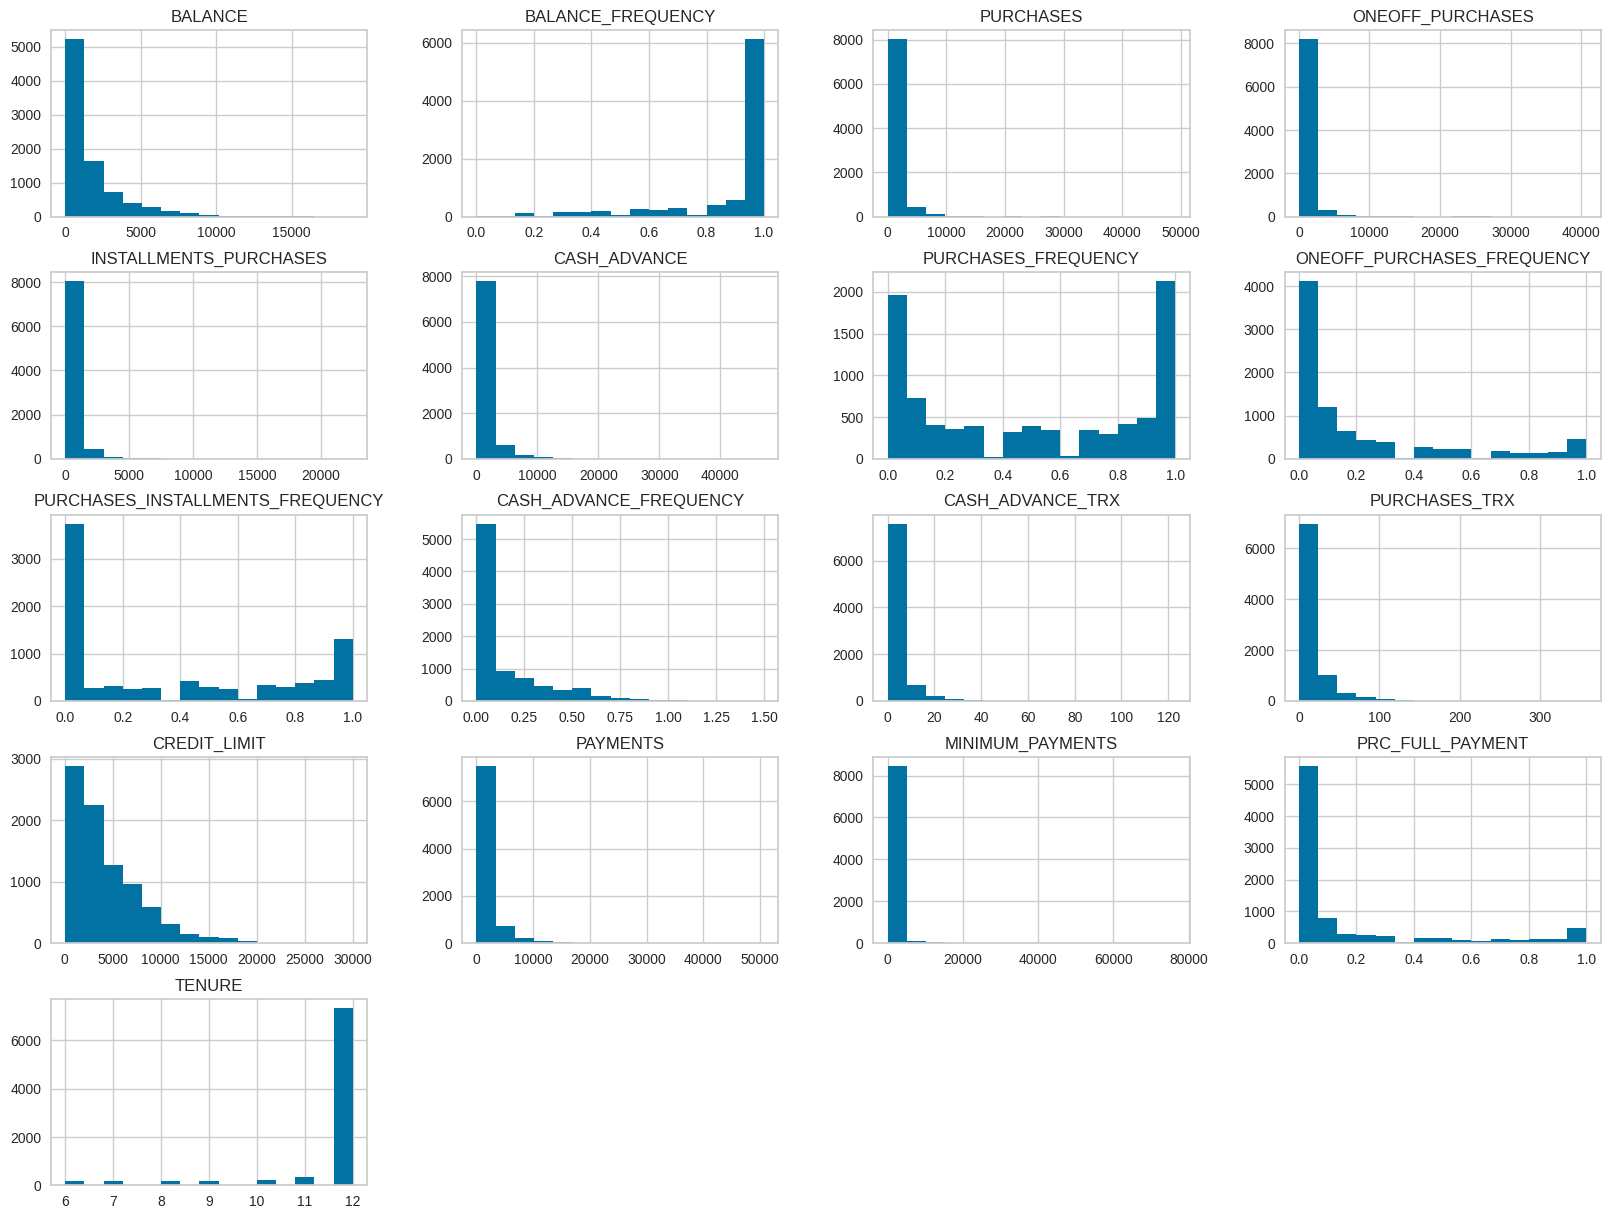

In [ ]:
# Plot histograms for numerical features to visualize their distributions.
df[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));

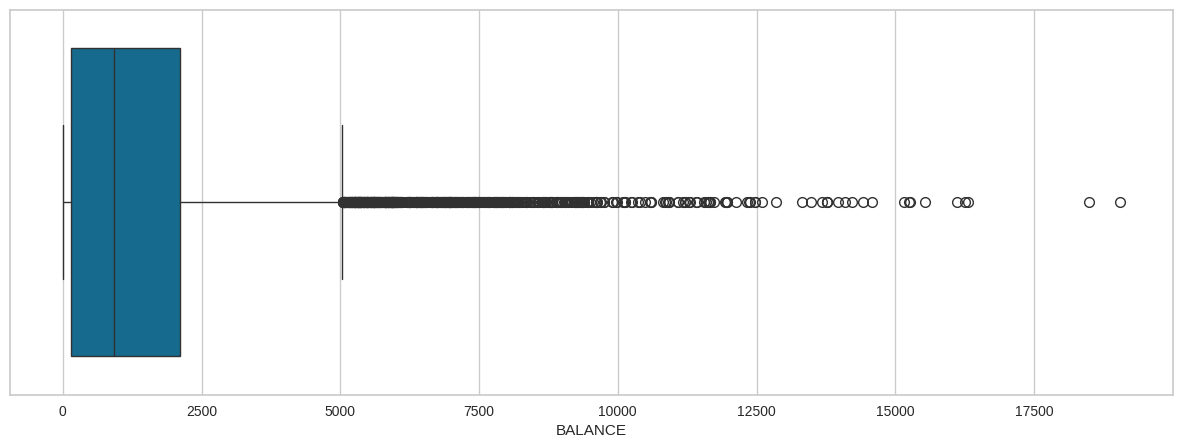

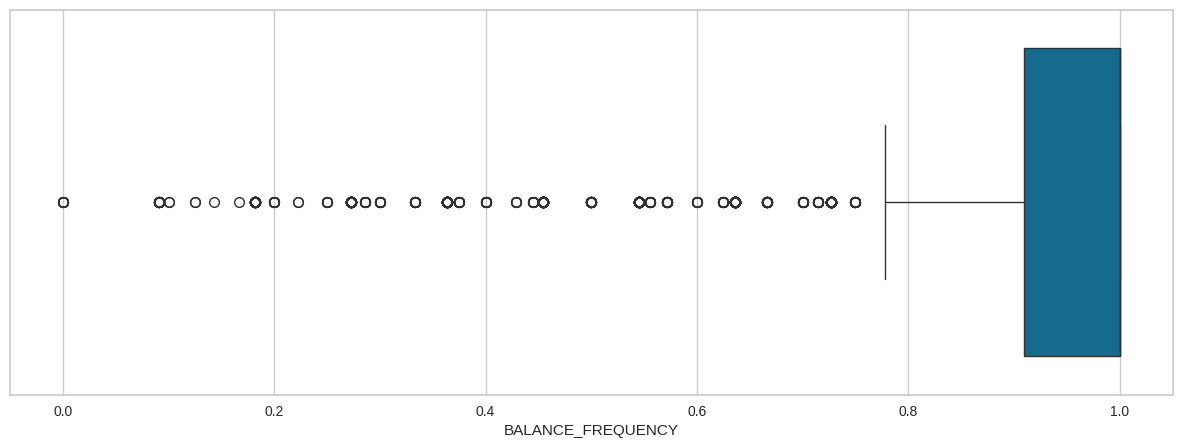

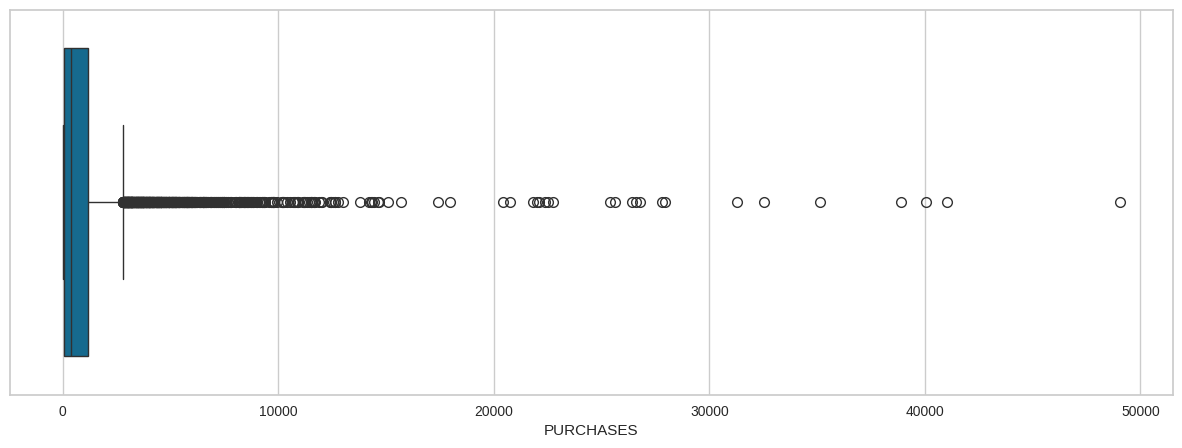

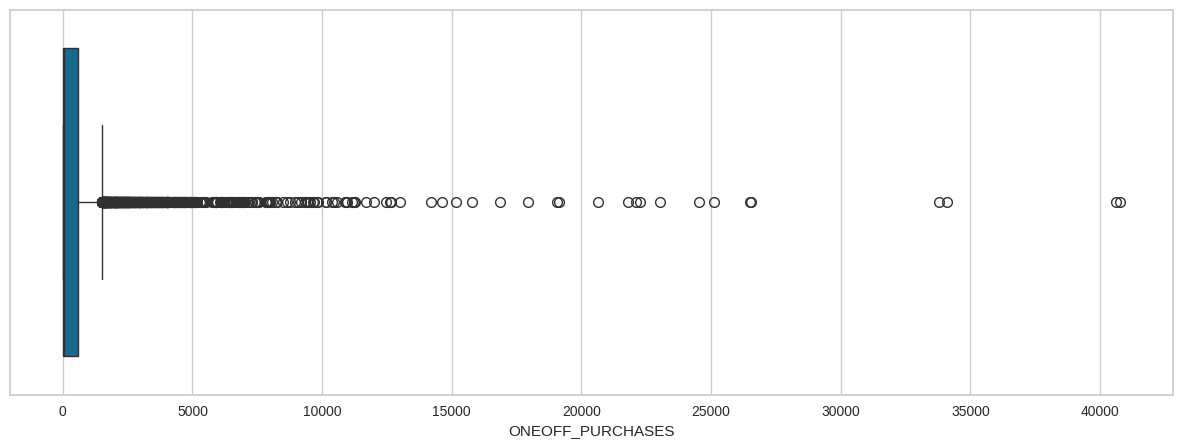

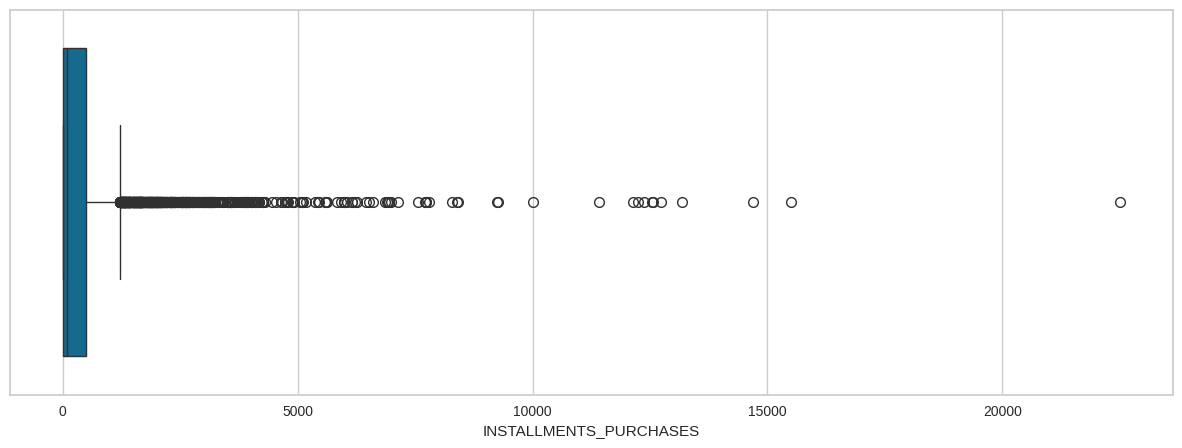

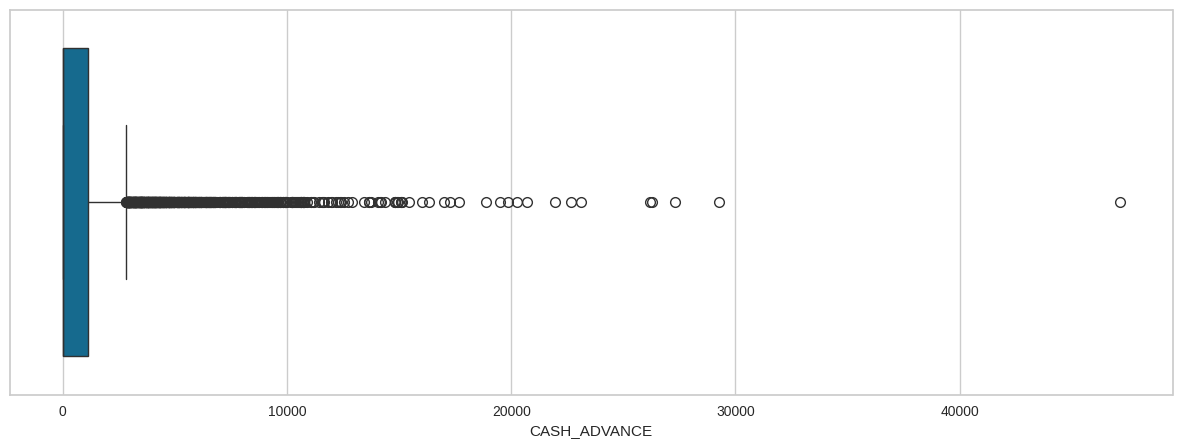

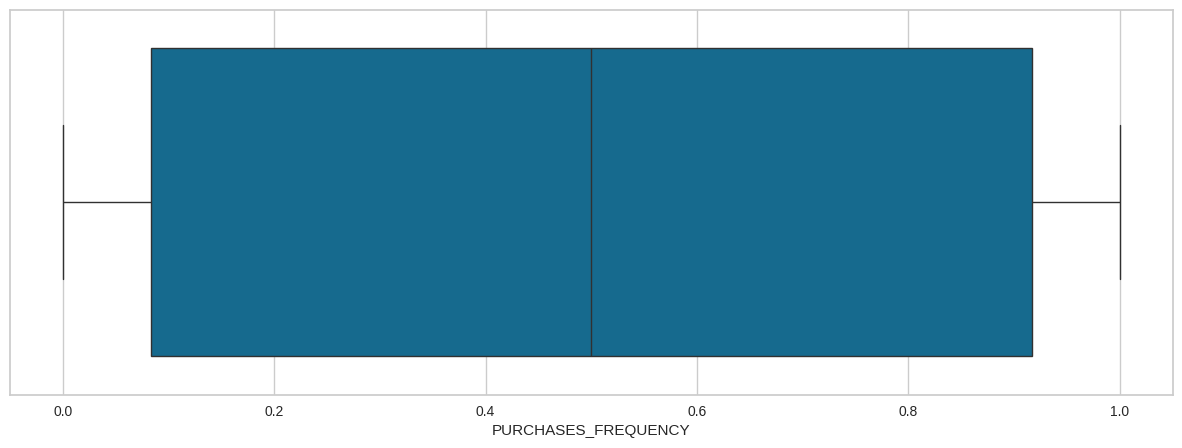

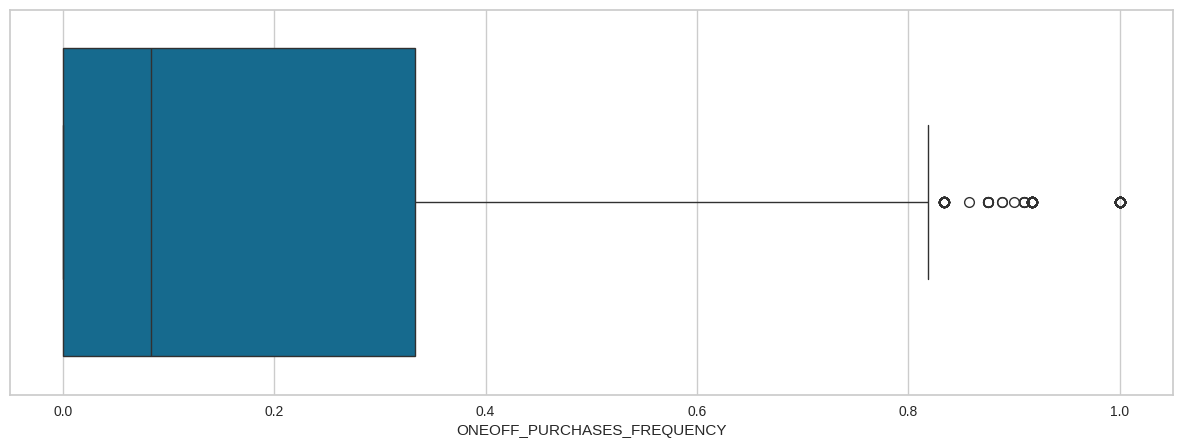

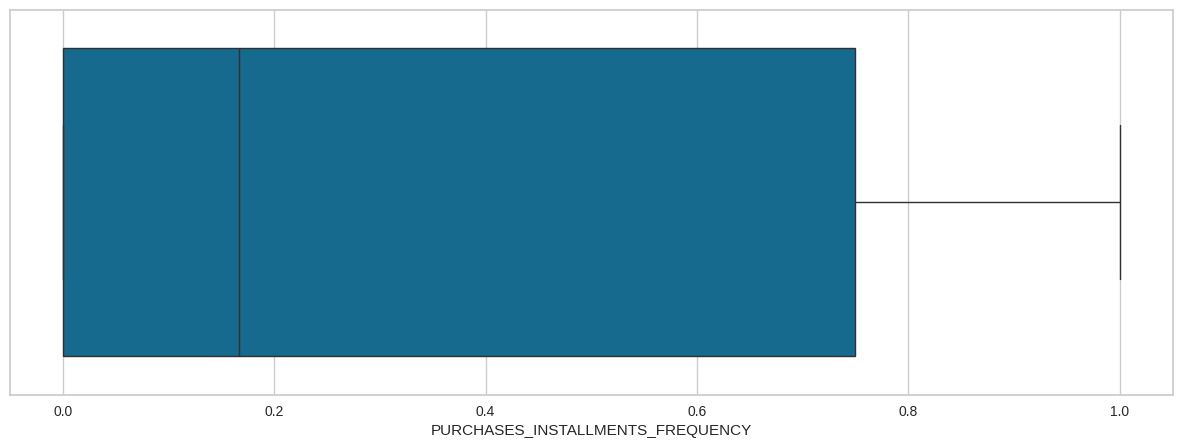

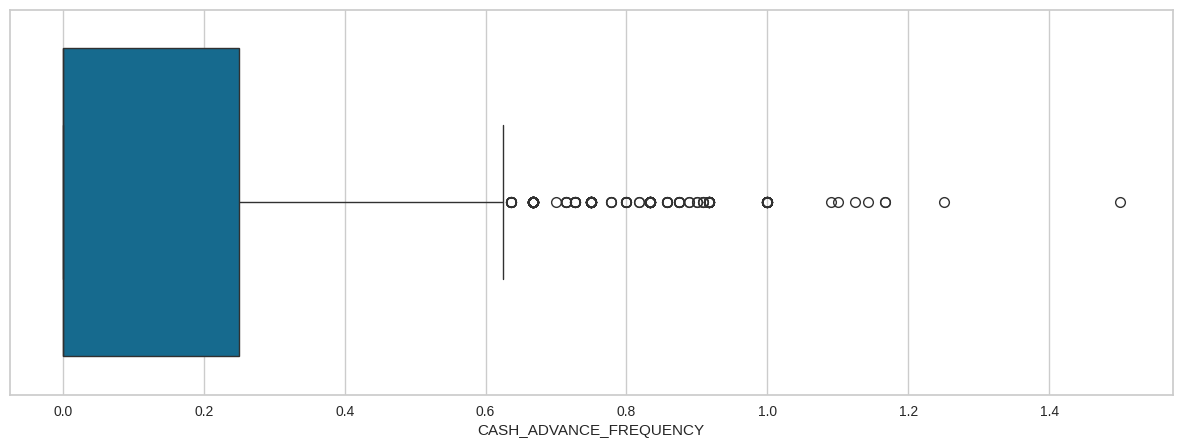

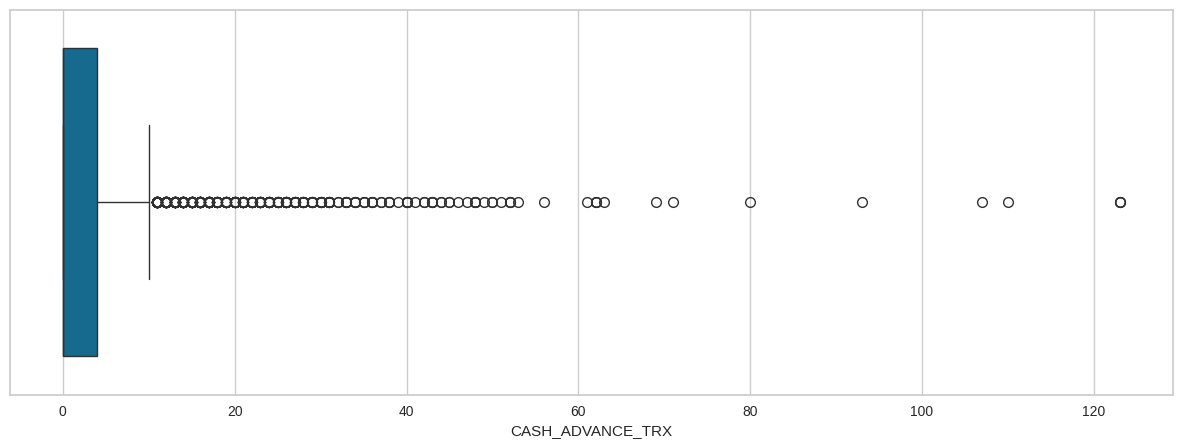

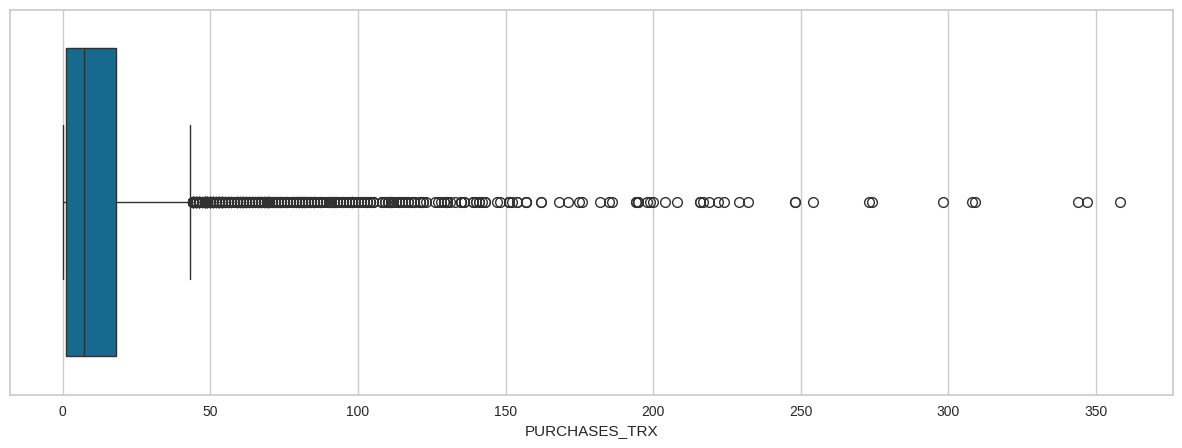

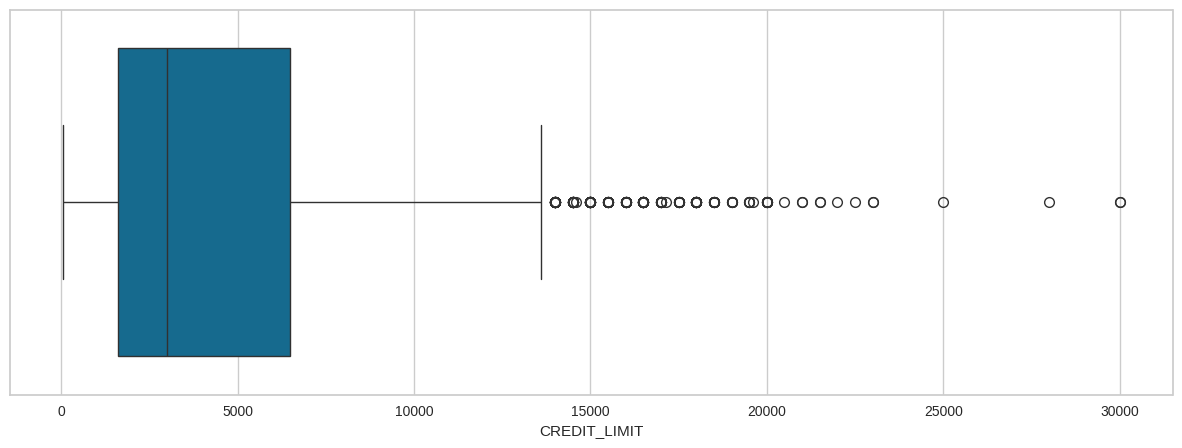

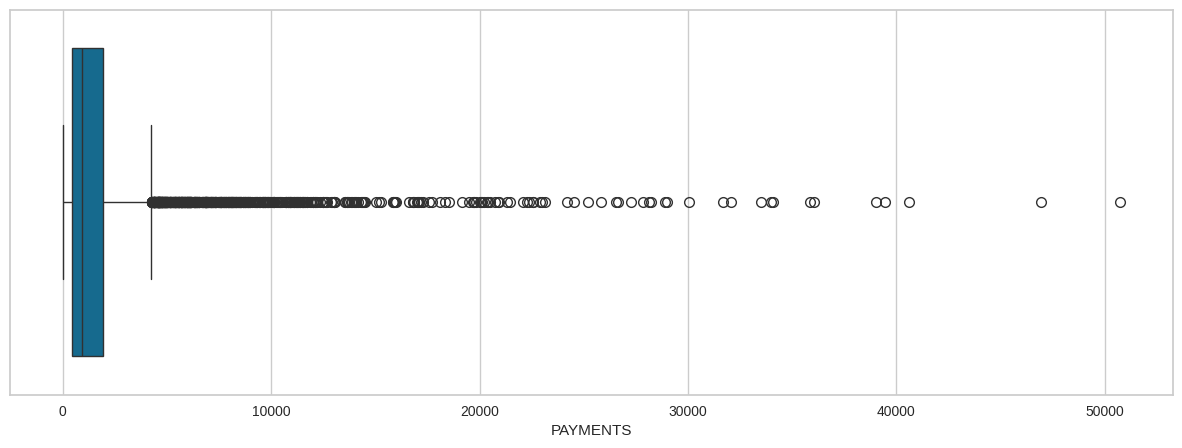

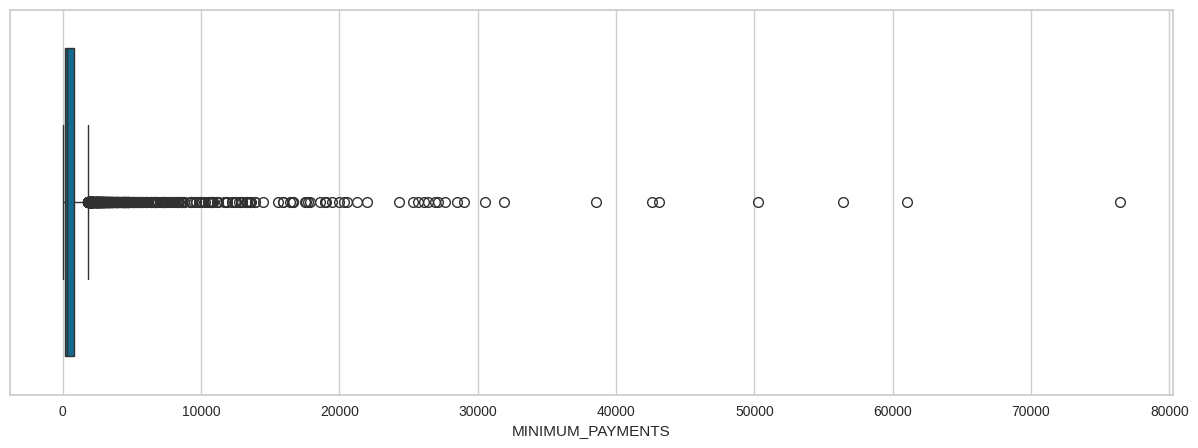

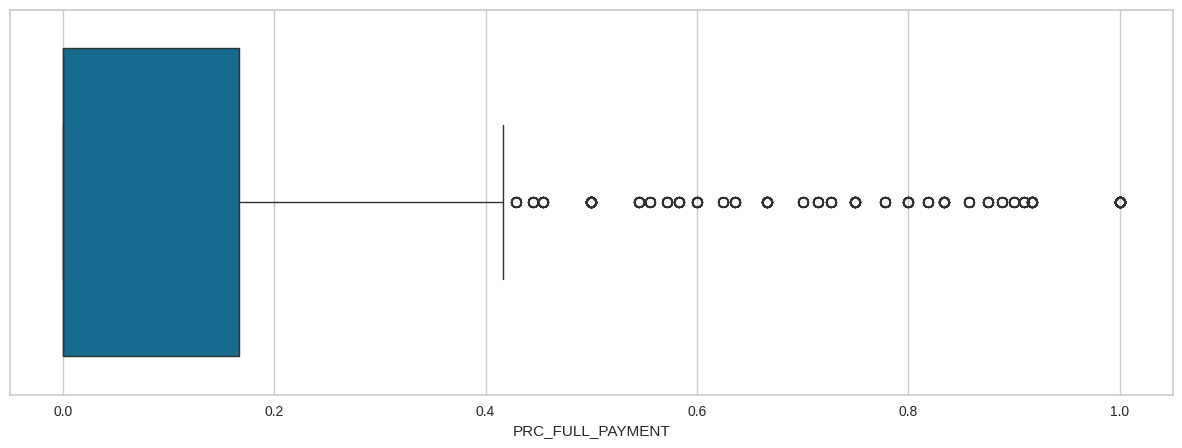

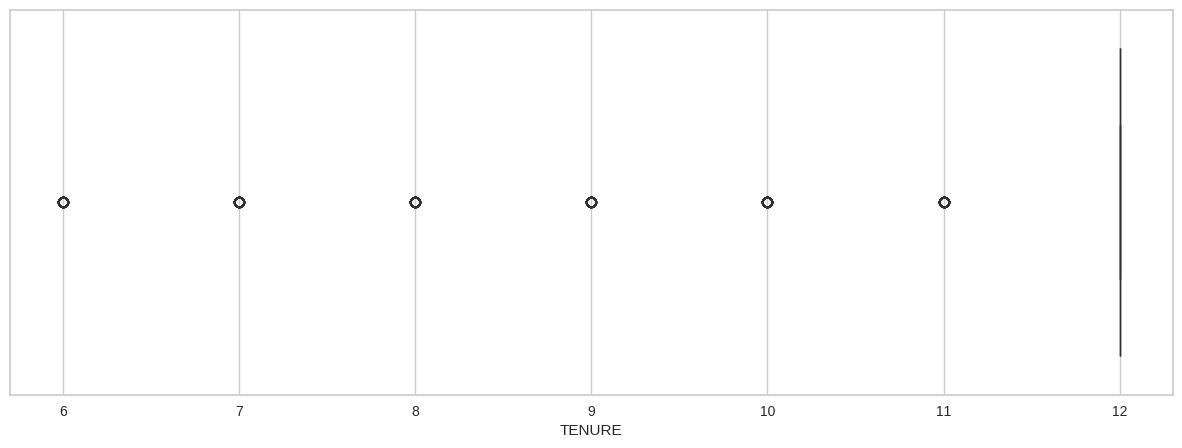

In [ ]:
# Plot boxplots for each numerical column to visualize the distribution and identify potential outliers.
for column in df.columns:
    plt.figure(figsize = (15,5))
    sns.boxplot(df[column] , orient='h')
    plt.show()

# Since the dataset has too many outliers , so I will not drop them.

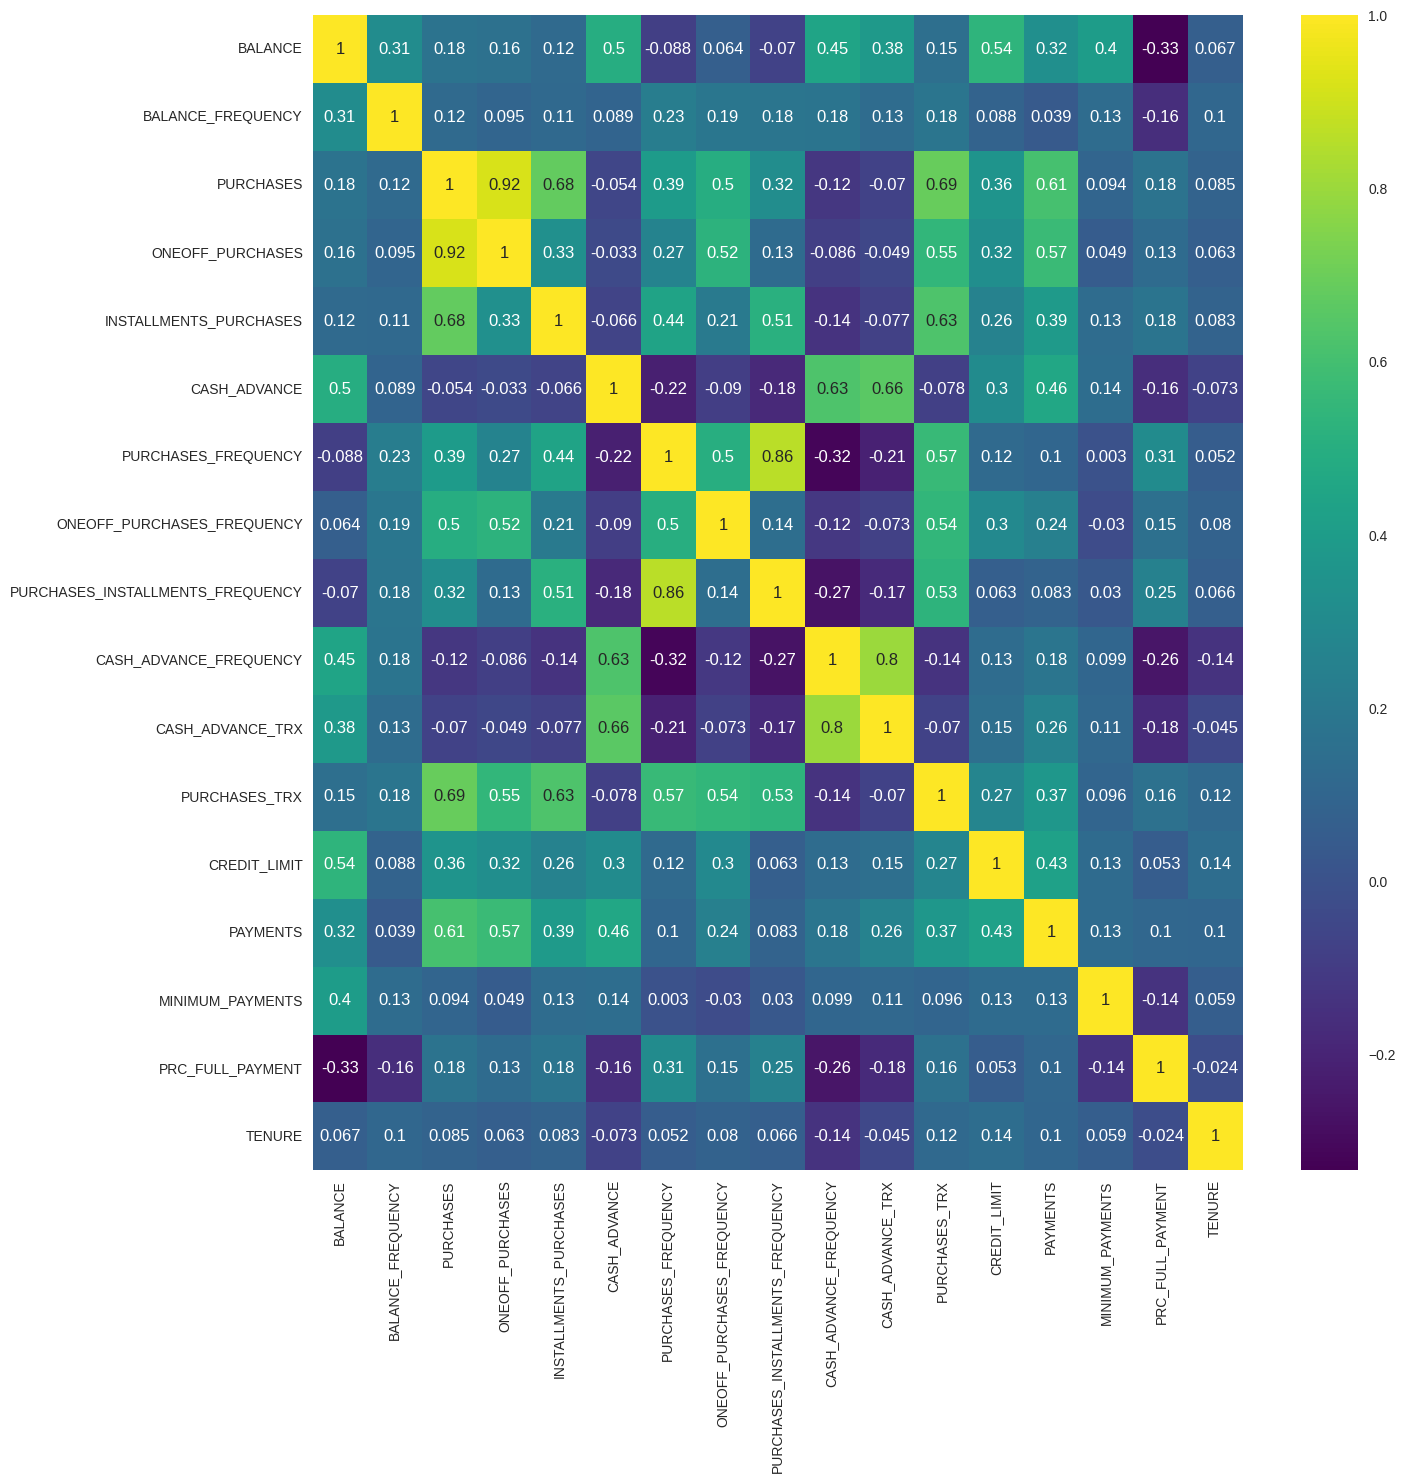

In [ ]:
# Generate a heatmap of the correlation matrix for the DataFrame.
# The heatmap visualizes the correlation coefficients between different features, helping to identify relationships and potential multicollinearity.
plt.figure(figsize=(15,15))
corr_data = df.corr()
sns.heatmap(corr_data,annot=True , cmap='viridis')
plt.show()

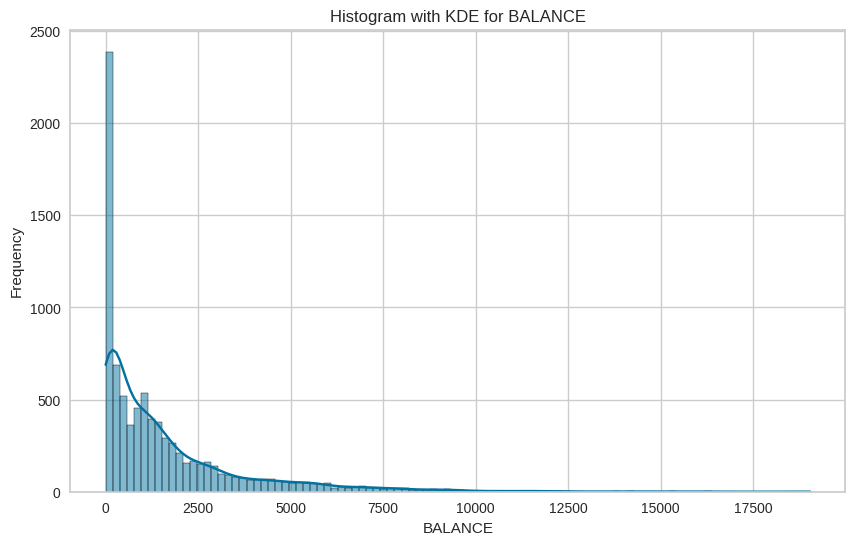

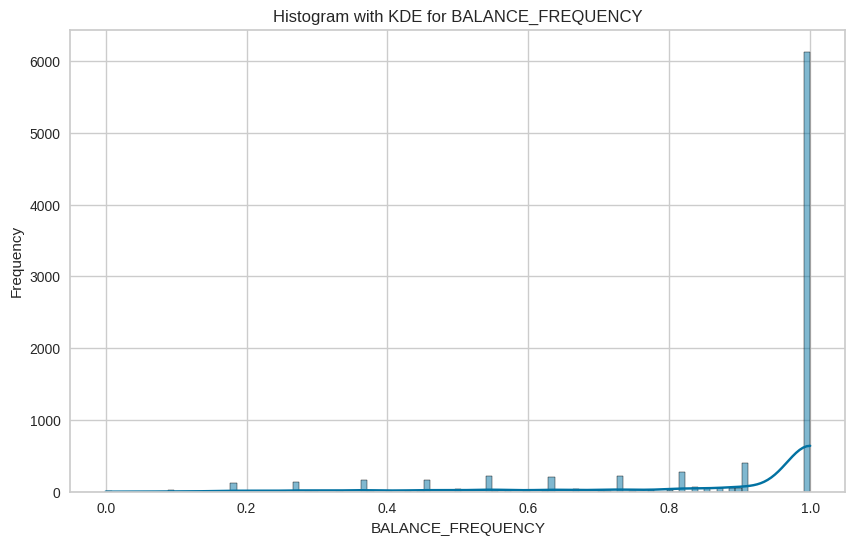

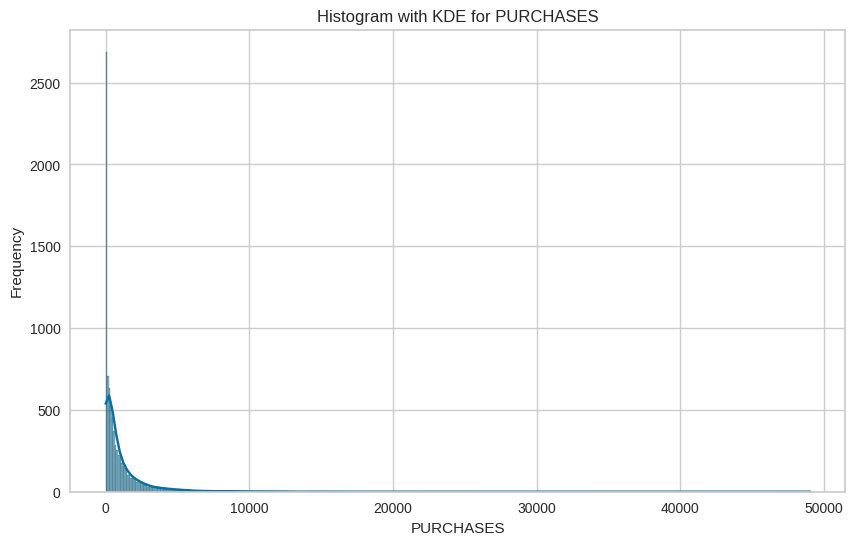

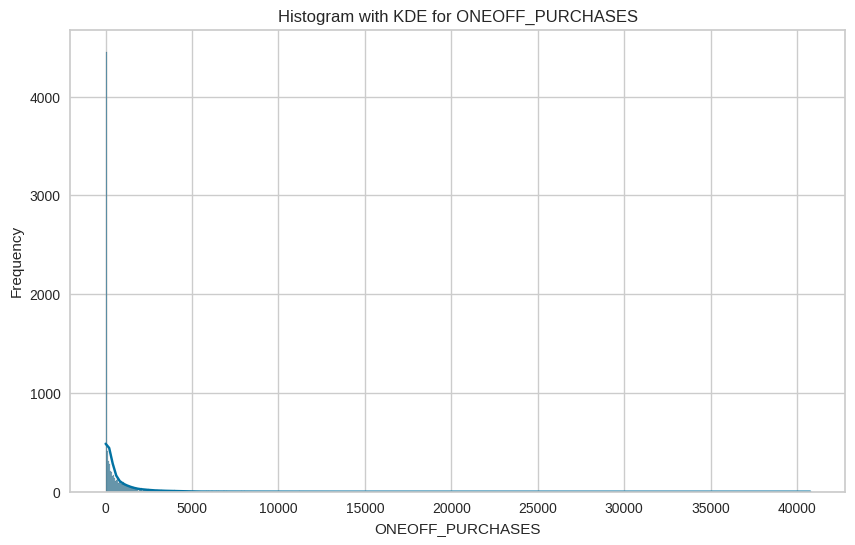

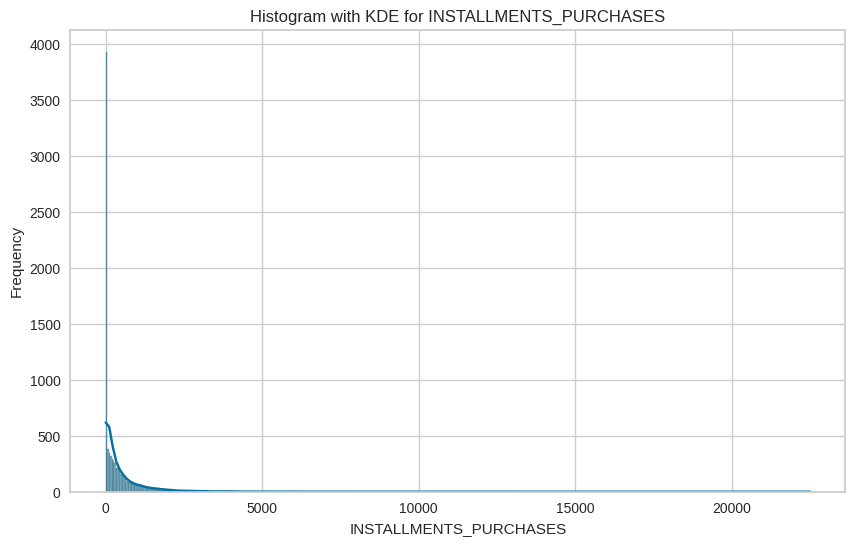

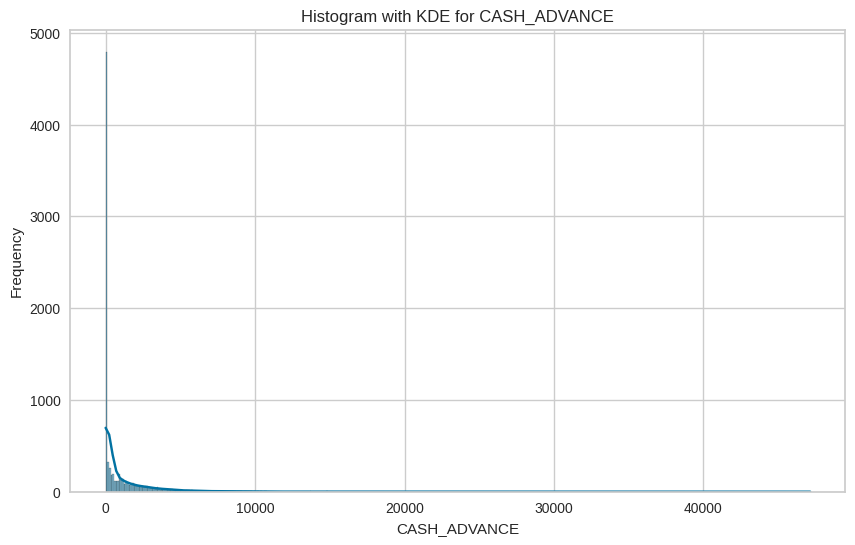

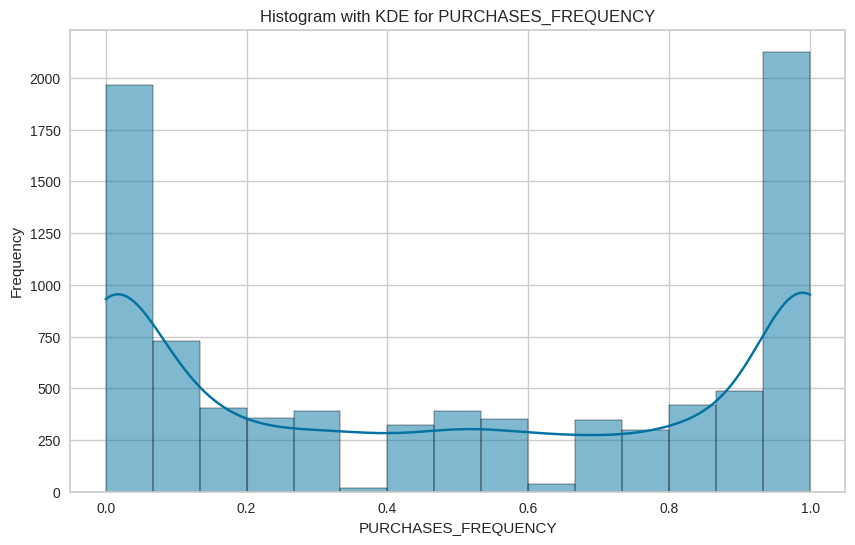

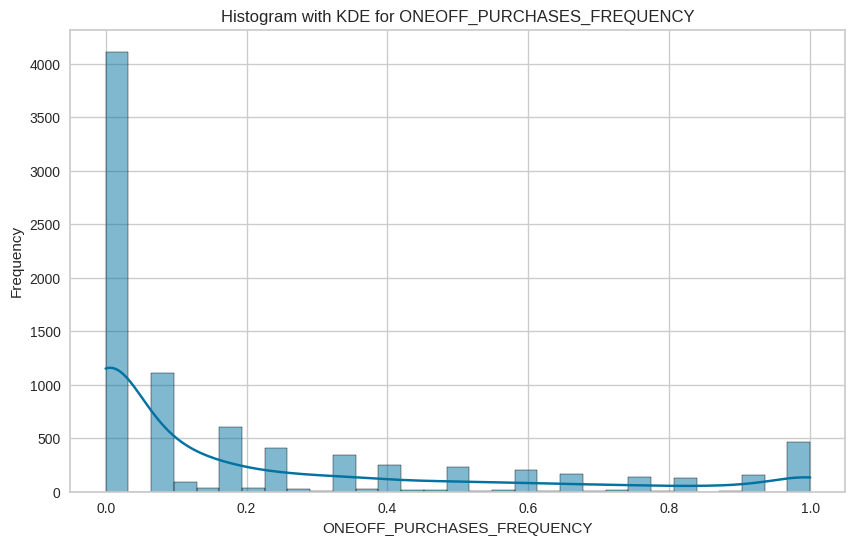

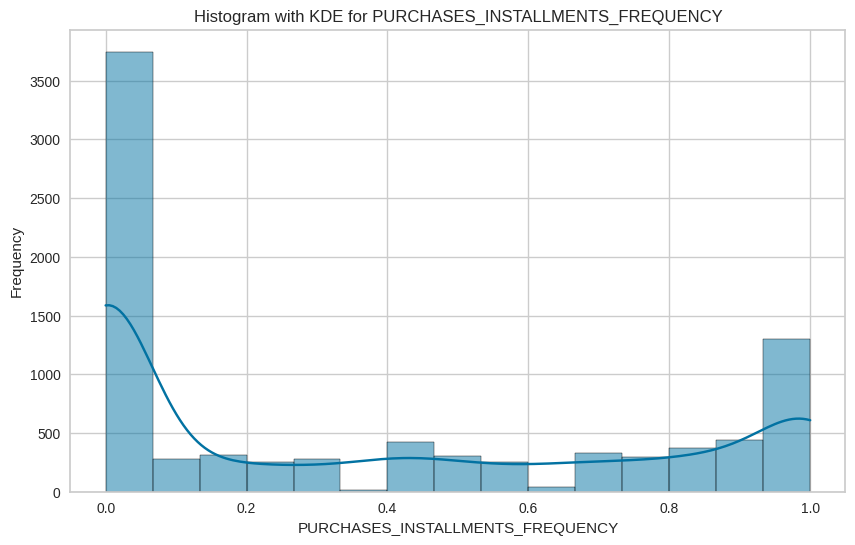

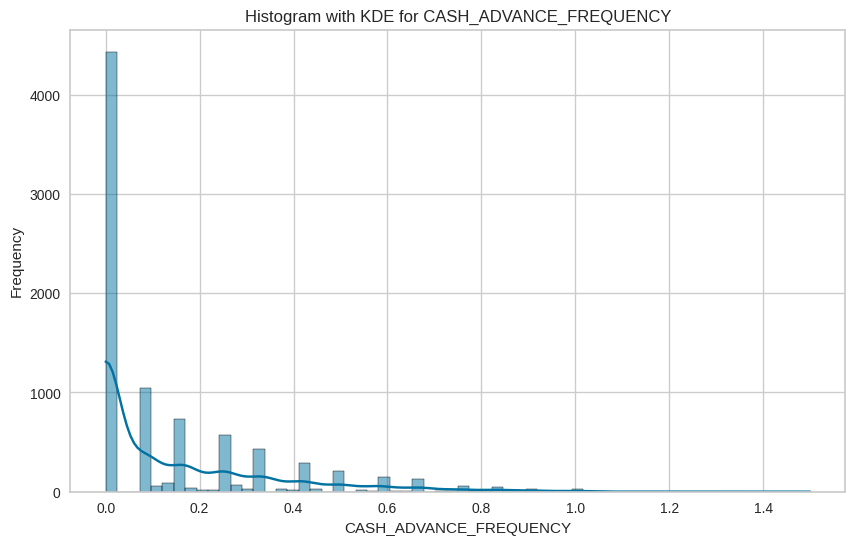

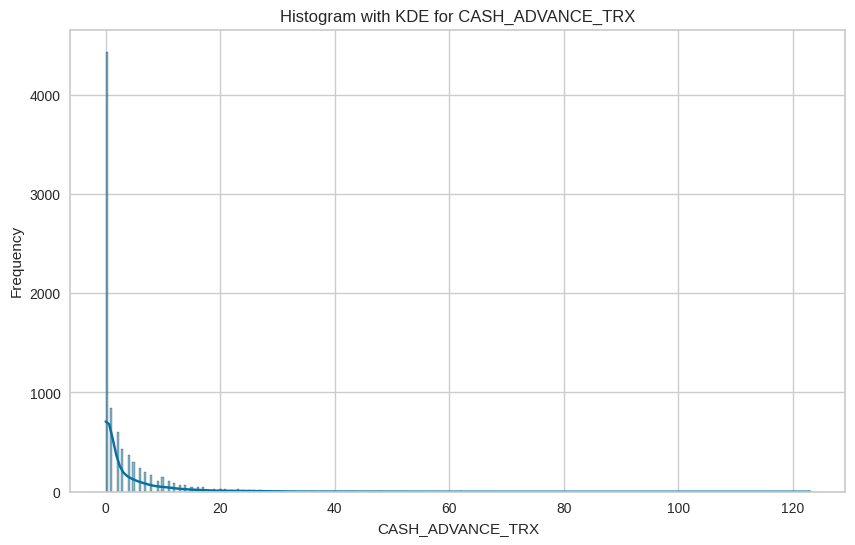

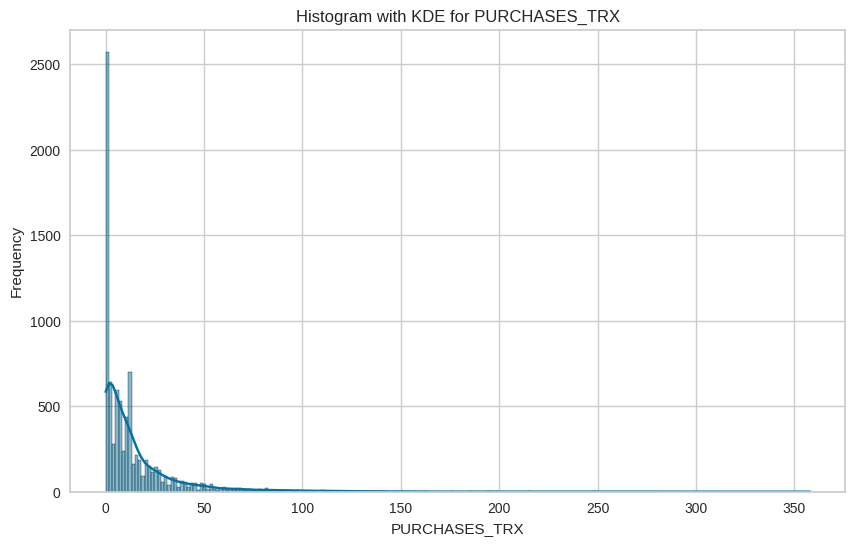

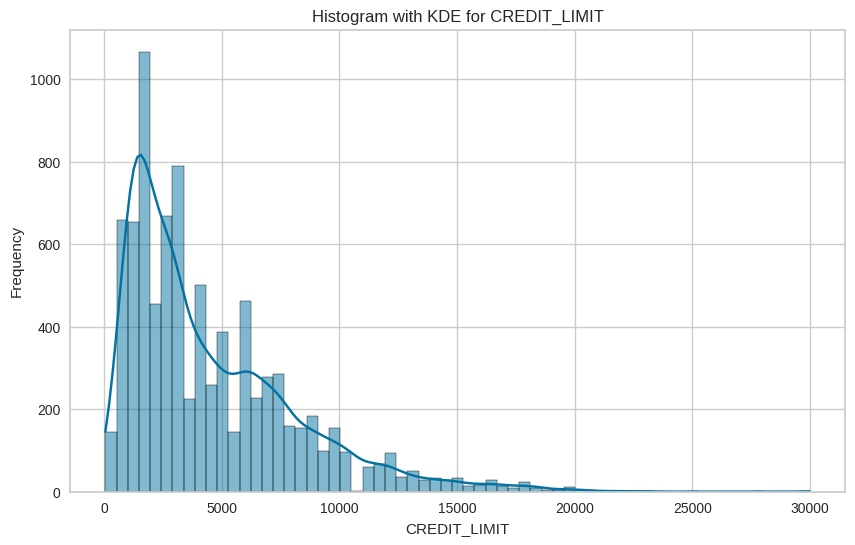

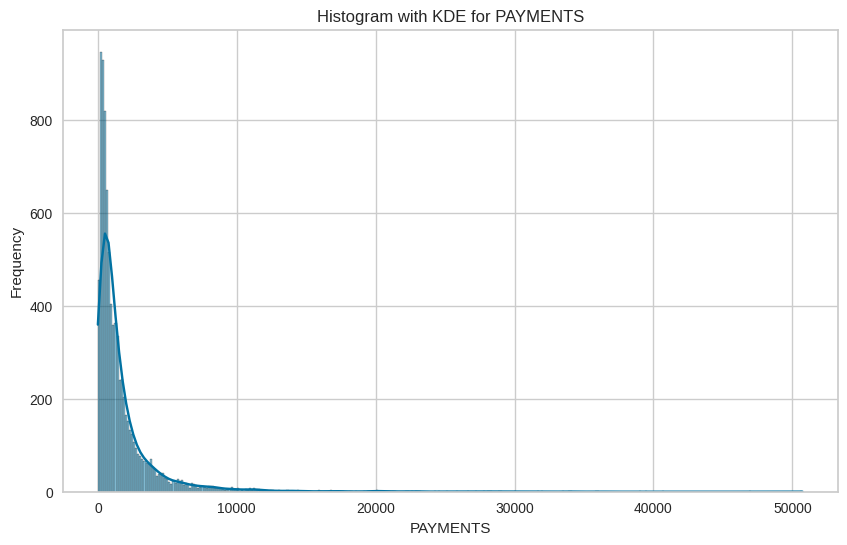

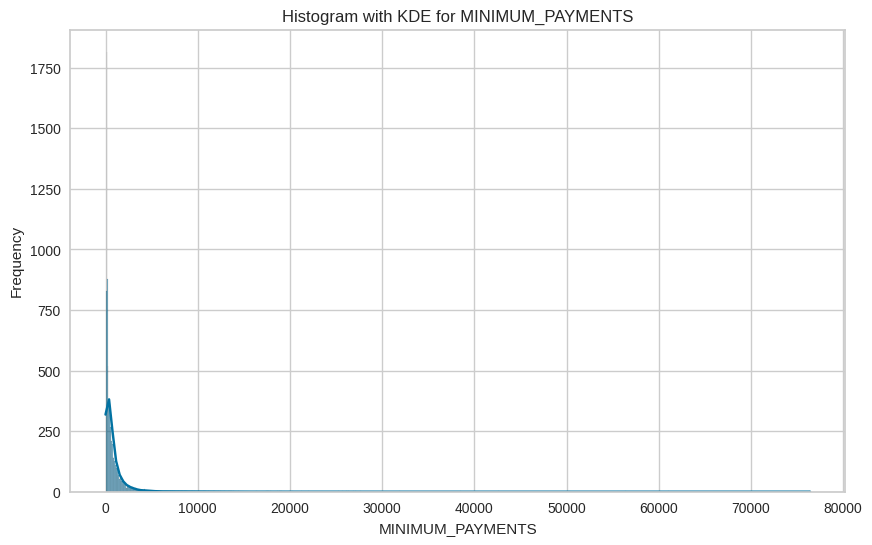

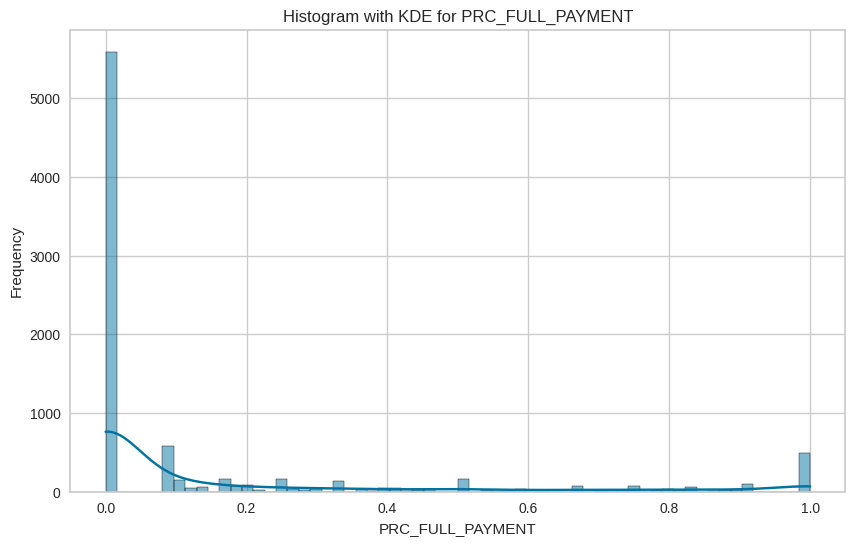

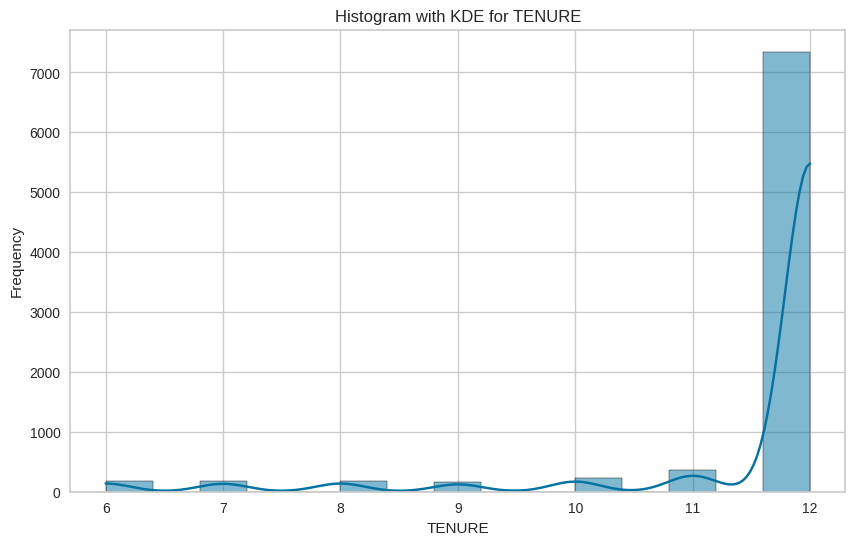

In [ ]:
# Plot histograms with Kernel Density Estimation (KDE) for each numerical column.
# This helps visualize the distribution of the data and identify potential patterns.
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

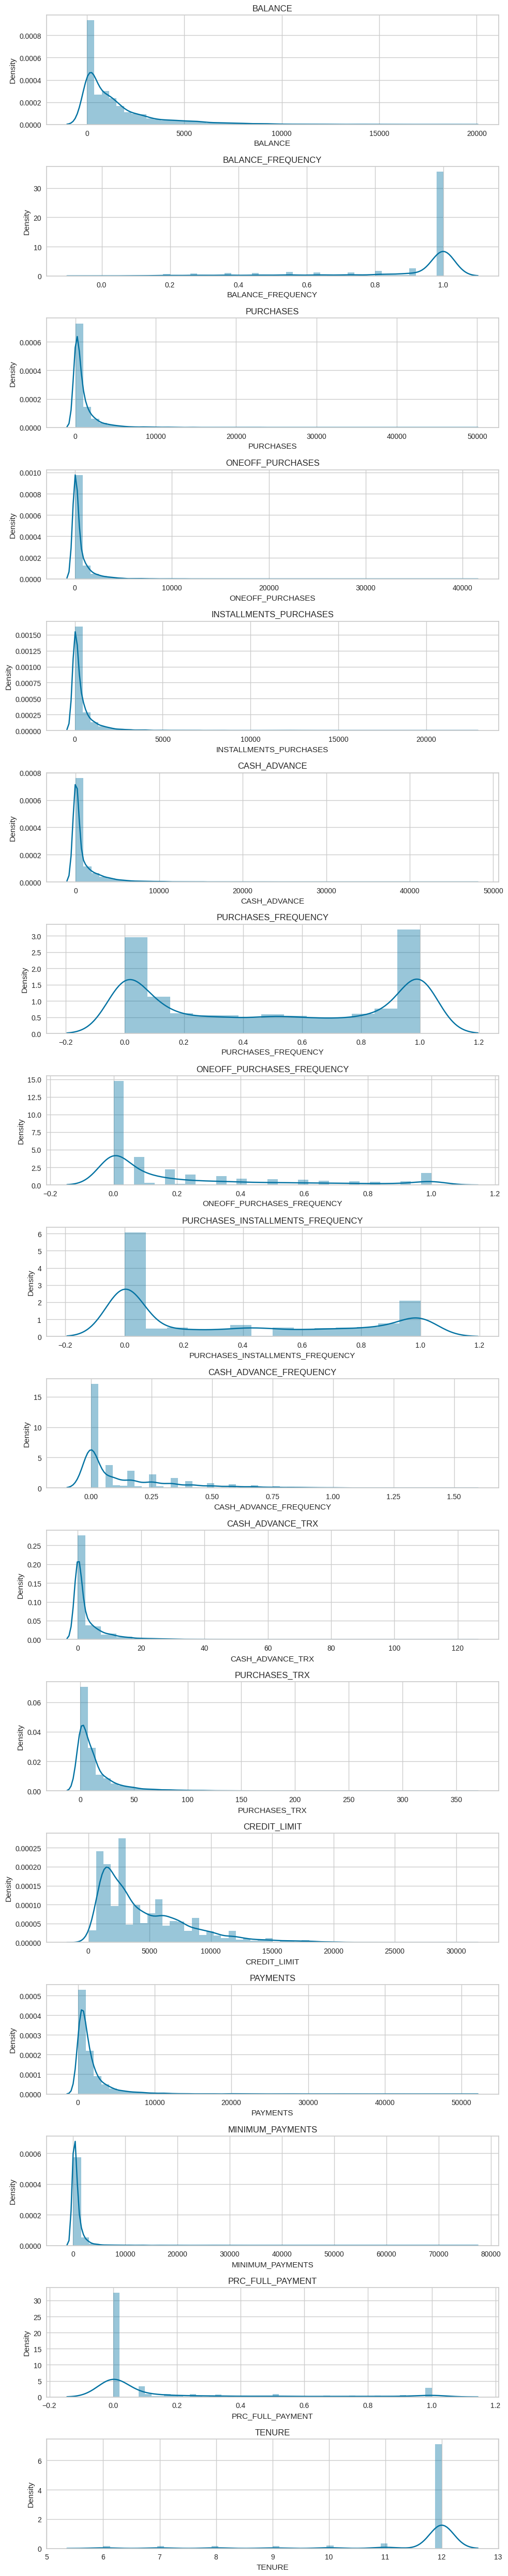

In [ ]:
# Plot distributions of all features.
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):

    plt.subplot(17, 1, i + 1)
    sns.distplot(df[df.columns[i]], kde = True)
    plt.title(df.columns[i])
plt.tight_layout();

# The data is skwed!

In [ ]:
# Define features with unbounded limits (require log transformation) and those with bounded limits.
high_value_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE',  'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','CASH_ADVANCE_TRX','PURCHASES_TRX']

low_value_features = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT','TENURE' ]

# Apply log transformation to features with unbounded limits using log1p to handle zero values.
log_scaled_data = np.log1p(df[high_value_features])
# Concatenate the log-transformed features with the original bounded features.
log_scaled_data[low_value_features] = df[low_value_features]

In [ ]:
# Display the first few rows of the log-transformed data.
log_scaled_data.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,CASH_ADVANCE_TRX,PURCHASES_TRX,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE
0,3.735304,4.568506,0.000000,4.568506,0.000000,6.908755,5.312231,4.945277,0.000000,1.098612,0.818182,0.166667,0.000000,0.083333,0.00,0.000000,12
1,8.071989,0.000000,0.000000,0.000000,8.770896,8.853808,8.319725,6.978531,1.609438,0.000000,0.909091,0.000000,0.000000,0.000000,0.25,0.222222,12
2,7.822504,6.651791,6.651791,0.000000,0.000000,8.922792,6.434654,6.442994,0.000000,2.564949,1.000000,1.000000,1.000000,0.000000,0.00,0.000000,12
4,6.707735,2.833213,2.833213,0.000000,0.000000,7.090910,6.521114,5.504483,0.000000,0.693147,1.000000,0.083333,0.083333,0.000000,0.00,0.000000,12
5,7.501540,7.196147,0.000000,7.196147,0.000000,7.496097,7.244983,7.786654,0.000000,2.197225,1.000000,0.666667,0.000000,0.583333,0.00,0.000000,12


In [ ]:
# Display descriptive statistics for the log-transformed data.
log_scaled_data.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,CASH_ADVANCE_TRX,PURCHASES_TRX,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,6.265737,4.928905,3.239500,3.387883,3.349135,8.099572,6.814890,5.922564,0.829327,1.916439,0.895035,0.496000,0.205909,0.368820,0.137604,0.159304,11.534391
std,1.895982,2.922819,3.252619,3.091009,3.571114,0.822341,1.159994,1.190068,1.015146,1.378707,0.207697,0.401273,0.300054,0.398093,0.201791,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.048326,0.018982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,5.004584,3.792507,0.000000,0.000000,0.000000,7.378384,6.039205,5.136760,0.000000,0.693147,0.909091,0.083333,0.000000,0.000000,0.000000,0.000000,12.000000
50%,6.822040,5.930666,3.828533,4.562106,0.000000,8.006701,6.799809,5.747647,0.000000,2.079442,1.000000,0.500000,0.083333,0.166667,0.000000,0.000000,12.000000
75%,7.652639,7.044888,6.397096,6.184453,7.032964,8.779711,7.576683,6.717196,1.609438,2.944439,1.000000,0.916667,0.333333,0.750000,0.250000,0.166667,12.000000
max,9.854515,10.800403,10.615512,10.021315,10.760839,10.308986,10.834125,11.243832,4.820282,5.883322,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000,12.000000


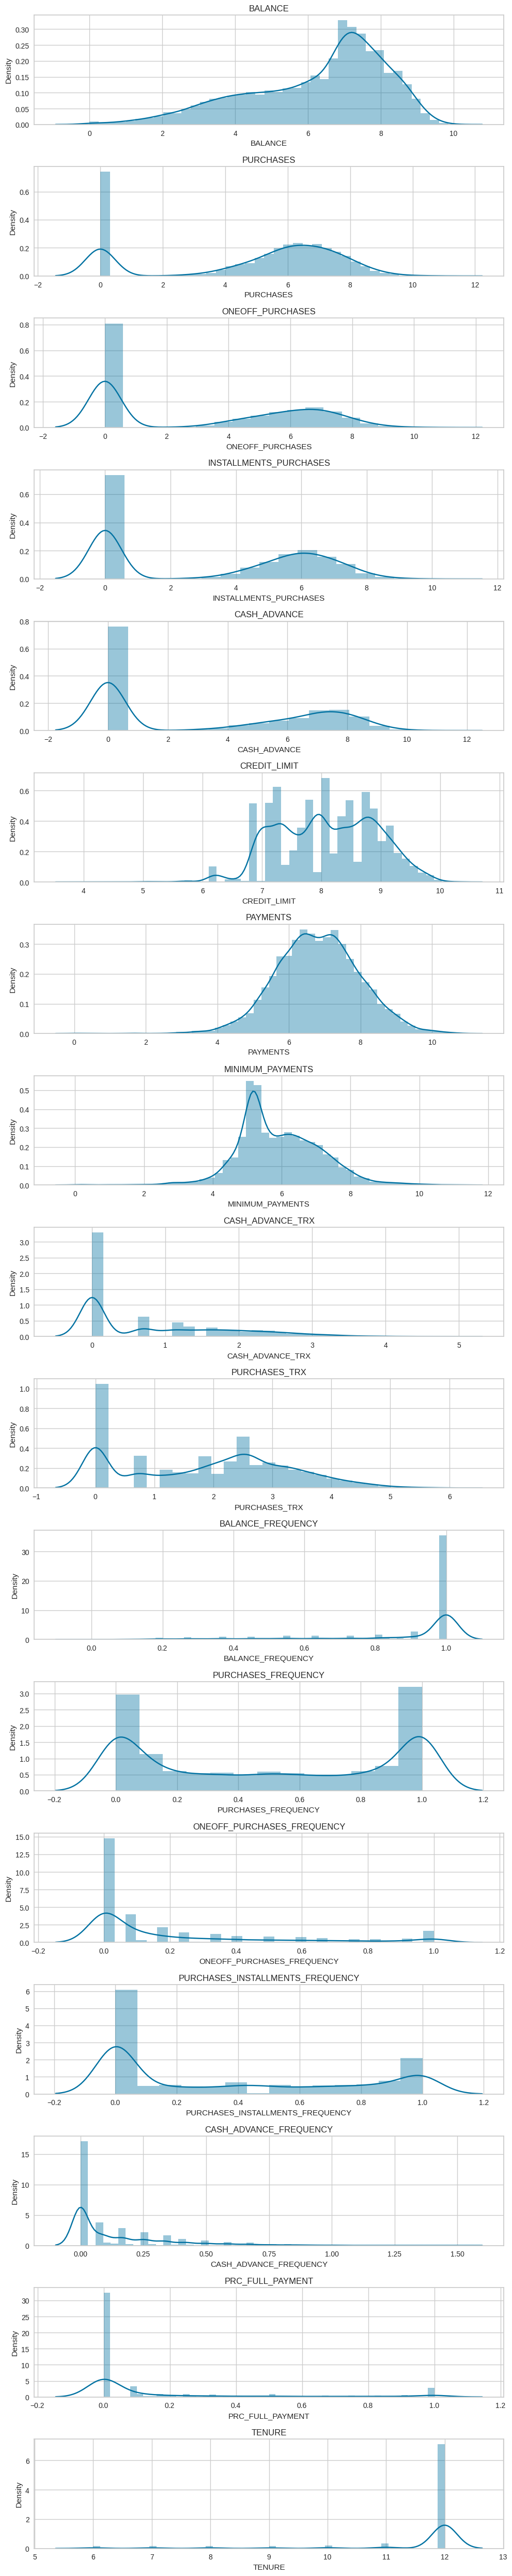

In [ ]:
# Plot distributions of all features after log transformation.
plt.figure(figsize=(10,50))
for i in range(len(log_scaled_data.columns)):

    plt.subplot(17, 1, i + 1)
    sns.distplot(log_scaled_data[log_scaled_data.columns[i]], kde = True)
    plt.title(log_scaled_data.columns[i])
plt.tight_layout();

In [ ]:
# # Apply RobustScaler to the log-scaled data
# scaler = RobustScaler()
# scaled_data = scaler.fit_transform(log_scaled_data)
# scaled_df = pd.DataFrame(scaled_data, columns=log_scaled_data.columns)
# scaled_df.head()

# Finding the best number of K to cluster the data:

In [ ]:
# # Determine the optimal number of clusters (k) for KMeans clustering using the elbow method.
# # The code iterates through different values of k (from 1 to n_clusters), fits a KMeans model for each k,
# # and calculates the inertia (sum of squared distances to the nearest cluster center).
# # The inertia values are stored in the 'cost' list, and later plotted to visualize the elbow point, which
# # suggests an optimal value of k.
# n_clusters = 20
# visualizer = KElbowVisualizer(KMeans(n_init=50), k=(1,n_clusters))
# visualizer.fit(log_scaled_data)
# visualizer.show()

# # Using silhouette score
# def calculate_optimal_k(data, max_k=20):
#     """
#     Calculates the optimal number of clusters (k) using the silhouette score.

#     Args:
#         data: The data to cluster.
#         max_k: The maximum number of clusters to try.

#     Returns:
#         A tuple containing:
#             - The optimal number of clusters.
#             - A list of silhouette scores for each k.
#     """
#     scaler = StandardScaler() # Use StandardScaler for better silhouette performance
#     scaled_data = scaler.fit_transform(data)
#     silhouette_scores = []
#     for k in range(2, max_k):
#         kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # Set random_state for reproducibility
#         kmeans.fit(scaled_data)
#         labels = kmeans.labels_
#         silhouette_avg = silhouette_score(scaled_data, labels)
#         silhouette_scores.append(silhouette_avg)

#     optimal_k = np.argmax(silhouette_scores) + 2  # +2 because we started from k=2
#     return optimal_k, silhouette_scores

# optimal_k, silhouette_scores = calculate_optimal_k(log_scaled_data)

# # Plotting
# plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs. Number of Clusters')
# plt.xticks(range(2, len(silhouette_scores) + 2))  # Ensures all k-values are displayed
# plt.grid(True)
# plt.show()

# print(f"Optimal number of clusters: {optimal_k}")

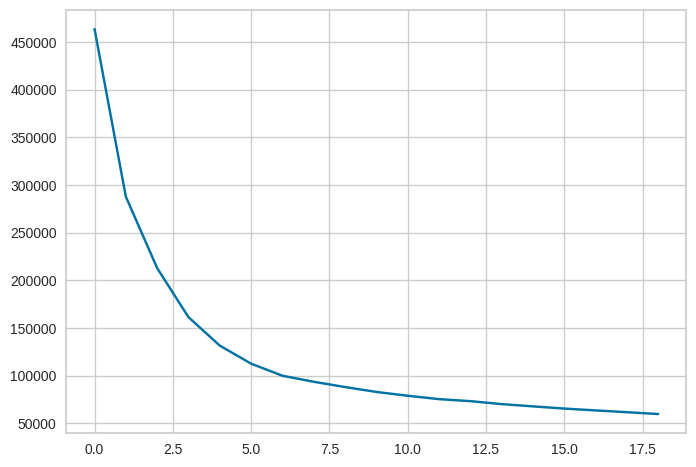

In [ ]:
# using elbow method to determine the optimal number of clusters (k) for KMeans clustering.
# The code iterates through a range of k values, fits a KMeans model for each k,
# and calculates the inertia (sum of squared distances to the nearest cluster center).
# The inertia values are then plotted against the k values to visualize the "elbow point,"
# which represents a good balance between minimizing inertia and avoiding overfitting.
n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i, n_init=50)
    kmean.fit(log_scaled_data)
    cost.append(kmean.inertia_)
plt.plot(cost, 'bx-')


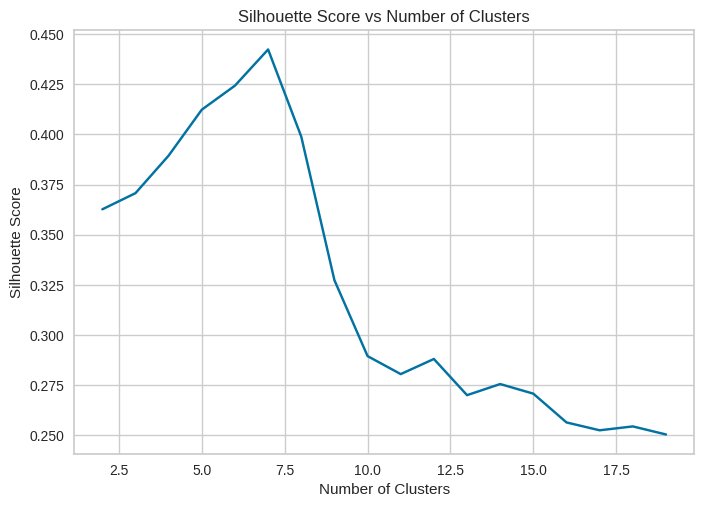

In [ ]:
# Using silhouette analysis to determine the optimal number of clusters for KMeans.
# The silhouette score measures how similar a data point is to its own cluster compared to other clusters.
# We iterate through a range of cluster numbers (from 2 to n_clusters), fit a KMeans model for each,
# and calculate the average silhouette score.  The plot shows the silhouette score for each number of clusters,
# helping us identify the value of k that maximizes the silhouette score, indicating a good clustering solution.
n_clusters = 20
silhouette_scores = []

for i in range(2, n_clusters):
    kmeans = KMeans(n_clusters=i, n_init=50)
    kmeans.fit(log_scaled_data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(log_scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.plot(range(2, n_clusters), silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


# From elbow method and silhouette the best number of K is 7.

# K-MEANS:

In [ ]:
# Initialize and fit the KMeans model with 7 clusters, 50 initializations, and a maximum of 1000 iterations.
kmeans = KMeans(n_clusters=7, n_init=50, max_iter=1000)
kmeans.fit(log_scaled_data)

KMeans(max_iter=1000, n_clusters=7, n_init=50)

In [ ]:
# Get the cluster labels assigned to each data point by the KMeans model.
clusters = kmeans.labels_
# Determine the total number of clusters.
len(clusters)

8636

# Reduce dimensionality using PCA

In [ ]:
# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca_reduced = pca.fit_transform(log_scaled_data)

In [ ]:
# Print number of components selected
print(f"Number of PCA components selected: {X_pca_reduced.shape[1]}")

Number of PCA components selected: 6


# Using t-SNE:

In [ ]:
# Apply t-SNE on PCA-reduced data
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_pca_reduced)

In [ ]:
# Prepare data for plotting
x_tsne, y_tsne, z_tsne = X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2]
new_df_tsne = pd.DataFrame({'x': x_tsne, 'y': y_tsne, 'z': z_tsne, 'label': clusters})

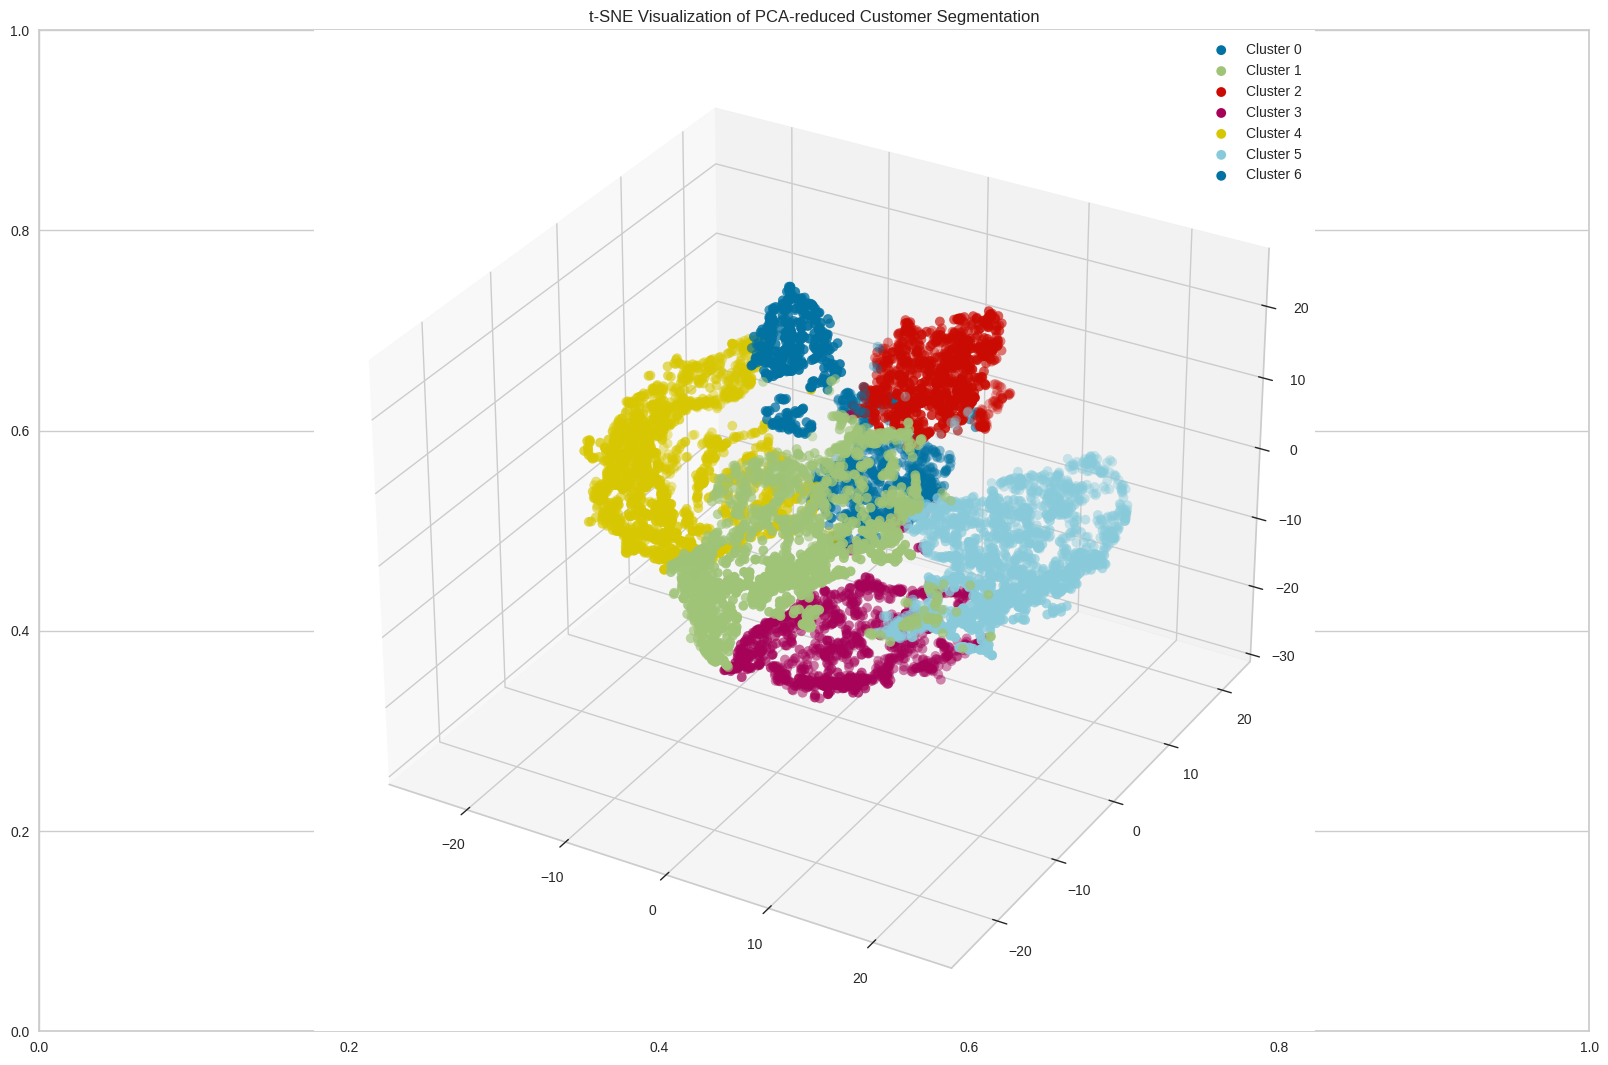

In [ ]:
# 3D Plot
fig, ax = plt.subplots(figsize=(20, 13))
ax = fig.add_subplot(projection='3d')
groups_tsne = new_df_tsne.groupby('label')

for name, group in groups_tsne:
    ax.scatter(group.x, group.y, group.z, marker='o', s=50, label=f'Cluster {name}', edgecolors='none')

ax.legend()
ax.set_title("t-SNE Visualization of PCA-reduced Customer Segmentation")
plt.show()

# Hierarchical Clustering:

In [ ]:
# Calculate the linkage matrix using 'ward' method for hierarchical clustering.
# The 'ward' method minimizes the variance of the clusters being merged.
linkage_matrix = linkage(log_scaled_data, method='ward')

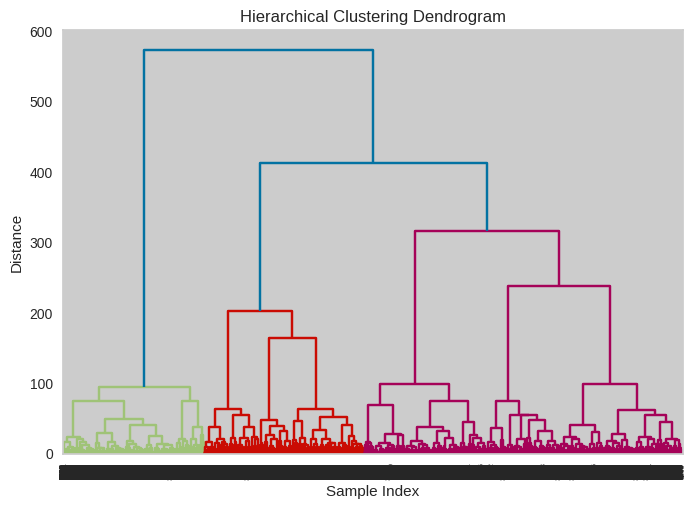

In [ ]:
# Plot the dendrogram to visualize the hierarchical clustering results.
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
# Cut the dendrogram to obtain clusters
num_clusters = 7
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [ ]:
# Create a copy of the log-scaled data and add a new column 'cluster' containing the cluster assignments.
df_with_clusters = log_scaled_data.copy()
df_with_clusters['cluster'] = clusters

In [ ]:
# df_with_clusters: This DataFrame contains the log-scaled customer data with an additional 'cluster' column.
# The 'cluster' column represents the cluster assignment for each customer based on the hierarchical clustering algorithm.
df_with_clusters

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,CASH_ADVANCE_TRX,PURCHASES_TRX,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE,cluster
0,3.735304,4.568506,0.000000,4.568506,0.000000,6.908755,5.312231,4.945277,0.000000,1.098612,0.818182,0.166667,0.000000,0.083333,0.000000,0.000000,12,5
1,8.071989,0.000000,0.000000,0.000000,8.770896,8.853808,8.319725,6.978531,1.609438,0.000000,0.909091,0.000000,0.000000,0.000000,0.250000,0.222222,12,1
2,7.822504,6.651791,6.651791,0.000000,0.000000,8.922792,6.434654,6.442994,0.000000,2.564949,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12,6
4,6.707735,2.833213,2.833213,0.000000,0.000000,7.090910,6.521114,5.504483,0.000000,0.693147,1.000000,0.083333,0.083333,0.000000,0.000000,0.000000,12,6
5,7.501540,7.196147,0.000000,7.196147,0.000000,7.496097,7.244983,7.786654,0.000000,2.197225,1.000000,0.666667,0.000000,0.583333,0.000000,0.000000,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,1.927413,3.086487,3.086487,0.000000,0.000000,6.216606,4.088408,3.794898,0.000000,0.693147,0.500000,0.166667,0.166667,0.000000,0.000000,0.000000,6,6
8945,3.384170,5.677165,0.000000,5.677165,0.000000,6.908755,5.788719,3.909748,0.000000,1.945910,1.000000,1.000000,0.000000,0.833333,0.000000,0.500000,6,5
8947,3.194529,4.979489,0.000000,4.979489,0.000000,6.908755,4.410016,4.423869,0.000000,1.791759,0.833333,0.833333,0.000000,0.666667,0.000000,0.250000,6,5
8948,2.671218,0.000000,0.000000,0.000000,3.625907,6.216606,3.980615,4.038755,1.098612,0.000000,0.833333,0.000000,0.000000,0.000000,0.166667,0.250000,6,1


# DBSCAN:

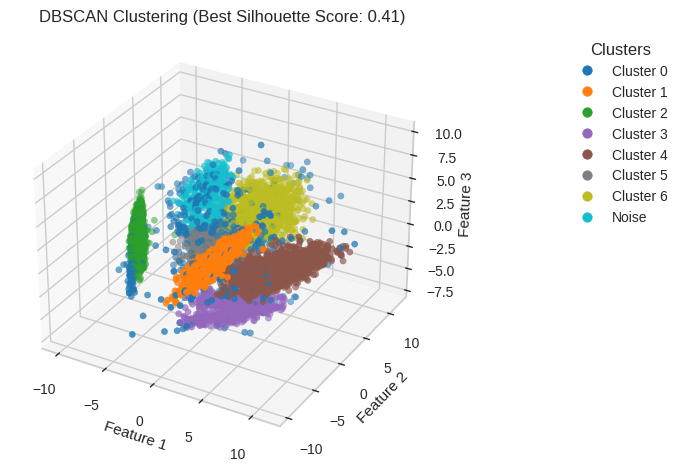

Best parameters: {'eps': np.float64(2.7222222222222223), 'min_samples': 100}
Best silhouette score: 0.40814673394598583


In [ ]:
# Perform dimensionality reduction using PCA to project the data into 3D space for visualization
X = log_scaled_data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Initialize variables to store the best silhouette score and corresponding DBSCAN parameters
best_score = -1
best_params = None

# Define the grid of hyperparameters for DBSCAN clustering
param_grid = {
    'eps': np.linspace(0.5, 3.0, 10),         # Epsilon values from 0.5 to 3.0
    'min_samples': [50, 100, 150, 200]        # Minimum samples per cluster
}

# Minimum required number of clusters (excluding noise)
min_num_clusters = 2

# Grid search to find the best DBSCAN hyperparameters based on silhouette score
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    y_dbscan = dbscan.fit_predict(X)

    # Proceed only if the number of identified clusters meets the minimum requirement
    if len(set(y_dbscan)) >= min_num_clusters:
        score = silhouette_score(X, y_dbscan)  # Evaluate clustering quality

        # Update best parameters if current configuration yields a higher silhouette score
        if score > best_score:
            best_score = score
            best_params = params

# Fit DBSCAN using the best found hyperparameters
best_dbscan = DBSCAN(**best_params)
y_dbscan_best = best_dbscan.fit_predict(X)

# Count the number of clusters found (excluding noise labeled as -1)
num_clusters_best = len(set(y_dbscan_best)) - (1 if -1 in y_dbscan_best else 0)

# Define a colormap with enough colors for the identified clusters
colors_best = plt.cm.tab10(np.linspace(0, 1, num_clusters_best + 1))
cmap_best = ListedColormap(colors_best)

# Create a 3D scatter plot to visualize the clustering result after PCA
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter_best = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_dbscan_best, cmap=cmap_best)

# Set axis labels and plot title
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title(f"DBSCAN Clustering (Best Silhouette Score: {best_score:.2f})")

# Create a legend indicating cluster labels (including noise)
legend_labels_best = [f'Cluster {i}' for i in range(num_clusters_best)]
legend_labels_best.append('Noise')
legend_best = ax.legend(
    handles=scatter_best.legend_elements()[0],
    labels=legend_labels_best,
    title="Clusters",
    loc='upper left',
    bbox_to_anchor=(1.3, 1)
)

# Adjust plot layout to make room for the legend
plt.subplots_adjust(right=0.7)
plt.show()

# Output the best DBSCAN parameters and corresponding silhouette score
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

# Gaussian Mixture Models(GMM):

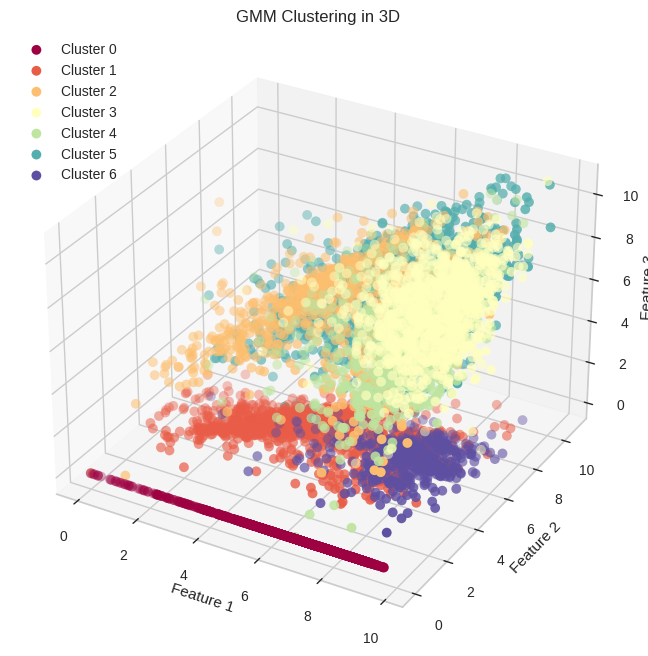

In [ ]:
# Apply Gaussian Mixture Model (GMM) clustering to the log-transformed and scaled dataset
# Set the number of mixture components (clusters) to 7
num_components = 7
gmm = GaussianMixture(n_components=num_components, random_state=42)
clusters = gmm.fit_predict(log_scaled_data)

# Visualize the clustering results in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define unique cluster labels and corresponding colors for plotting
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot data points for each cluster in 3D space using the first three features
for k, col in zip(unique_labels, colors):
    x = log_scaled_data.iloc[clusters == k, 0]  # Feature 1
    y = log_scaled_data.iloc[clusters == k, 1]  # Feature 2
    z = log_scaled_data.iloc[clusters == k, 2]  # Feature 3

    ax.scatter(x, y, z, s=50, c=[col], marker='o', edgecolors='none', label=f'Cluster {k}')

# Set plot title and axis labels for better readability
ax.set_title('GMM Clustering in 3D')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.show()


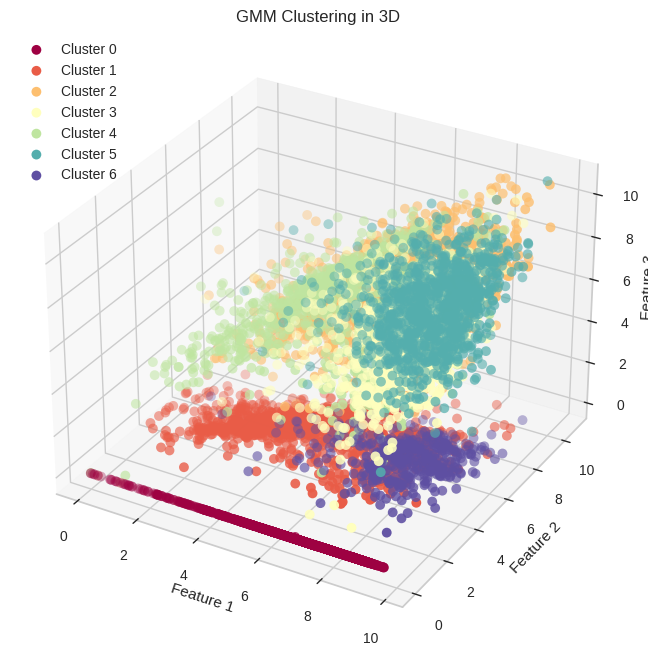

In [ ]:
# Apply Gaussian Mixture Model (GMM) clustering on the PCA-reduced feature set
num_components = 7  # Set the number of Gaussian components (i.e., clusters) to fit
gmm = GaussianMixture(n_components=num_components, random_state=42)
clusters = gmm.fit_predict(X_pca)  # Predict cluster labels based on fitted GMM

# Initialize a 3D plot to visualize the GMM clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign unique colors to each cluster using a spectral colormap
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot each cluster in 3D space using the original log-scaled features
for k, col in zip(unique_labels, colors):
    x = log_scaled_data.iloc[clusters == k, 0]  # Feature 1 for cluster k
    y = log_scaled_data.iloc[clusters == k, 1]  # Feature 2 for cluster k
    z = log_scaled_data.iloc[clusters == k, 2]  # Feature 3 for cluster k

    # Scatter plot for the current cluster with unique color and label
    ax.scatter(x, y, z, s=50, c=[col], marker='o', edgecolors='none', label=f'Cluster {k}')

# Set plot title and axis labels
ax.set_title('GMM Clustering in 3D')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()  # Display legend to distinguish clusters
plt.show()  # Render the 3D scatter plot


# Calculate the Adjusted Rand Index (ARI) among the used clustering methods:

# What is Adjusted Rand Index?

The Adjusted Rand Index (ARI) is a metric used to measure the similarity between two different clusterings of the same data.  It considers all pairs of data points and assesses whether they are assigned to the same or different clusters in both clusterings.  A perfect match between the two clusterings results in an ARI of 1, while an ARI close to 0 indicates a random assignment of data points to clusters.  Negative values suggest that the two clusterings are worse than random.

In the code, ARI is used to compare the results of K-means clustering with the results of Hierarchical clustering, DBSCAN, and Gaussian Mixture Model clustering. This helps to understand how similar the cluster assignments generated by different methods are, giving a measure of the consistency between algorithms.

In [ ]:
# Assuming 'kmeans_labels', 'hierarchical_labels', 'dbscan_labels', and 'gmm_labels' are the cluster labels obtained from each algorithm, applied to the same data.

# Calculate the Adjusted Rand Index (ARI) between K-means and other clustering methods
ari_kmeans_hierarchical = adjusted_rand_score(kmeans.labels_, clusters)
ari_kmeans_dbscan = adjusted_rand_score(kmeans.labels_, y_dbscan_best)
ari_kmeans_gmm = adjusted_rand_score(kmeans.labels_, clusters)

print(f"Adjusted Rand Index (K-means vs. Hierarchical): {ari_kmeans_hierarchical}")
print(f"Adjusted Rand Index (K-means vs. DBSCAN): {ari_kmeans_dbscan}")
print(f"Adjusted Rand Index (K-means vs. GMM): {ari_kmeans_gmm}")


# Calculate ARI for other pairs of clustering methods
ari_hierarchical_dbscan = adjusted_rand_score(clusters, y_dbscan_best)
ari_hierarchical_gmm = adjusted_rand_score(clusters, clusters)
ari_dbscan_gmm = adjusted_rand_score(y_dbscan_best, clusters)

print(f"Adjusted Rand Index (Hierarchical vs. DBSCAN): {ari_hierarchical_dbscan}")
print(f"Adjusted Rand Index (Hierarchical vs. GMM): {ari_hierarchical_gmm}")
print(f"Adjusted Rand Index (DBSCAN vs. GMM): {ari_dbscan_gmm}")


Adjusted Rand Index (K-means vs. Hierarchical): 0.9521234009260473
Adjusted Rand Index (K-means vs. DBSCAN): 0.8932399928989634
Adjusted Rand Index (K-means vs. GMM): 0.9521234009260473
Adjusted Rand Index (Hierarchical vs. DBSCAN): 0.9172098784903487
Adjusted Rand Index (Hierarchical vs. GMM): 1.0
Adjusted Rand Index (DBSCAN vs. GMM): 0.9172098784903487


# Business Meaning of Each Cluster:

In [ ]:
# Assuming the best number of clusters is 7 based on previous analysis (elbow and silhouette).
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, n_init=50, max_iter=1000, random_state=42)
kmeans.fit(log_scaled_data)
cluster_labels = kmeans.labels_

# Add the cluster labels to the original log-scaled dataframe
log_scaled_data_with_clusters = log_scaled_data.copy()
log_scaled_data_with_clusters['Cluster'] = cluster_labels

# Calculate the mean values for each feature within each cluster
cluster_characteristics = log_scaled_data_with_clusters.groupby('Cluster').mean()

print("Cluster Characteristics (Mean values after log transformation):")
print(cluster_characteristics)

# We will look at the mean values for each feature in each cluster

print("\nCharacteristics of Each Cluster:")

# Loop through each cluster and print its characteristics
for cluster_num in range(num_clusters):
    print(f"\n--- Cluster {cluster_num} ---")
    cluster_data = cluster_characteristics.loc[cluster_num]

    print("Characteristics (relative to other clusters):")

    # BALANCE: Account balance
    if cluster_data['BALANCE'] > cluster_characteristics['BALANCE'].mean():
        print("- High Average Balance")
    else:
        print("- Low Average Balance")

    # BALANCE_FREQUENCY: How often the balance is updated (1.0 is frequently updated)
    if cluster_data['BALANCE_FREQUENCY'] > cluster_characteristics['BALANCE_FREQUENCY'].mean():
        print("- Balance Updated Frequently")
    else:
        print("- Balance Updated Infrequently")

    # PURCHASES: Total purchases made
    if cluster_data['PURCHASES'] > cluster_characteristics['PURCHASES'].mean():
        print("- High Total Purchases")
    else:
        print("- Low Total Purchases")

    # ONEOFF_PURCHASES: Value of one-time purchases
    if cluster_data['ONEOFF_PURCHASES'] > cluster_characteristics['ONEOFF_PURCHASES'].mean():
        print("- High One-off Purchases")
    else:
        print("- Low One-off Purchases")

    # INSTALLMENTS_PURCHASES: Value of installment purchases
    if cluster_data['INSTALLMENTS_PURCHASES'] > cluster_characteristics['INSTALLMENTS_PURCHASES'].mean():
        print("- High Installment Purchases")
    else:
        print("- Low Installment Purchases")

    # CASH_ADVANCE: Cash in advance transactions
    if cluster_data['CASH_ADVANCE'] > cluster_characteristics['CASH_ADVANCE'].mean():
        print("- High Cash Advance Usage")
    else:
        print("- Low Cash Advance Usage")

    # PURCHASES_FREQUENCY: How often purchases are made
    if cluster_data['PURCHASES_FREQUENCY'] > cluster_characteristics['PURCHASES_FREQUENCY'].mean():
        print("- Frequent Purchases")
    else:
        print("- Infrequent Purchases")

    # ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off purchases
    if cluster_data['ONEOFF_PURCHASES_FREQUENCY'] > cluster_characteristics['ONEOFF_PURCHASES_FREQUENCY'].mean():
        print("- Frequent One-off Purchases")
    else:
        print("- Infrequent One-off Purchases")

    # PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases
    if cluster_data['PURCHASES_INSTALLMENTS_FREQUENCY'] > cluster_characteristics['PURCHASES_INSTALLMENTS_FREQUENCY'].mean():
        print("- Frequent Installment Purchases")
    else:
        print("- Infrequent Installment Purchases")

    # CASH_ADVANCE_FREQUENCY: How often cash in advance is used
    if cluster_data['CASH_ADVANCE_FREQUENCY'] > cluster_characteristics['CASH_ADVANCE_FREQUENCY'].mean():
        print("- Frequent Cash Advance Usage")
    else:
        print("- Infrequent Cash Advance Usage")

    # CASH_ADVANCE_TRX: Number of cash advance transactions
    if cluster_data['CASH_ADVANCE_TRX'] > cluster_characteristics['CASH_ADVANCE_TRX'].mean():
        print("- High Number of Cash Advance Transactions")
    else:
        print("- Low Number of Cash Advance Transactions")

    # PURCHASES_TRX: Number of purchase transactions
    if cluster_data['PURCHASES_TRX'] > cluster_characteristics['PURCHASES_TRX'].mean():
        print("- High Number of Purchase Transactions")
    else:
        print("- Low Number of Purchase Transactions")

    # CREDIT_LIMIT: Credit limit assigned
    if cluster_data['CREDIT_LIMIT'] > cluster_characteristics['CREDIT_LIMIT'].mean():
        print("- High Credit Limit")
    else:
        print("- Low Credit Limit")

    # PAYMENTS: Total payments made
    if cluster_data['PAYMENTS'] > cluster_characteristics['PAYMENTS'].mean():
        print("- High Payments Made")
    else:
        print("- Low Payments Made")

    # MINIMUM_PAYMENTS: Minimum payment amount required
    if cluster_data['MINIMUM_PAYMENTS'] > cluster_characteristics['MINIMUM_PAYMENTS'].mean():
        print("- High Minimum Payments Required")
    else:
        print("- Low Minimum Payments Required")

    # PRC_FULL_PAYMENT: Percentage of times full payment was made
    if cluster_data['PRC_FULL_PAYMENT'] > cluster_characteristics['PRC_FULL_PAYMENT'].mean():
        print("- High Full Payment Percentage")
    else:
        print("- Low Full Payment Percentage")

    # TENURE: Number of months customer has been with the company
    if cluster_data['TENURE'] > cluster_characteristics['TENURE'].mean():
        print("- Longer Customer Tenure")
    else:
        print("- Shorter Customer Tenure")

    if cluster_data['PURCHASES_FREQUENCY'] > cluster_characteristics['PURCHASES_FREQUENCY'].mean() and \
       cluster_data['PURCHASES'] > cluster_characteristics['PURCHASES'].mean() and \
       cluster_data['PAYMENTS'] > cluster_characteristics['PAYMENTS'].mean():
        business_meaning += " high purchase activity and make significant payments."
        if cluster_data['ONEOFF_PURCHASES'] > cluster_characteristics['ONEOFF_PURCHASES'].mean():
            business_meaning += " They are likely high-value shoppers making significant one-off purchases."
        elif cluster_data['INSTALLMENTS_PURCHASES'] > cluster_characteristics['INSTALLMENTS_PURCHASES'].mean():
             business_meaning += " They are active buyers who prefer installment payments."
    elif cluster_data['CASH_ADVANCE'] > cluster_characteristics['CASH_ADVANCE'].mean() and \
         cluster_data['CASH_ADVANCE_FREQUENCY'] > cluster_characteristics['CASH_ADVANCE_FREQUENCY'].mean():
        business_meaning += " frequent cash advance usage."
    elif cluster_data['BALANCE'] > cluster_characteristics['BALANCE'].mean() and \
         cluster_data['MINIMUM_PAYMENTS'] > cluster_characteristics['MINIMUM_PAYMENTS'].mean() and \
         cluster_data['PRC_FULL_PAYMENT'] < cluster_characteristics['PRC_FULL_PAYMENT'].mean():
        business_meaning += " high balances and tend to make minimum payments, potentially indicating revolving credit users."
    elif cluster_data['PRC_FULL_PAYMENT'] > cluster_characteristics['PRC_FULL_PAYMENT'].mean():
         business_meaning += " a high tendency to pay their balance in full, suggesting financially disciplined customers."
    else:
        business_meaning += " a specific pattern of behavior that may require further investigation to fully understand."

Cluster Characteristics (Mean values after log transformation):
          BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
Cluster                                                                  
0        7.095173   0.022042          0.014653                0.011041   
1        4.414599   5.755679          0.137466                5.746030   
2        5.419821   5.988375          5.982099                0.100026   
3        7.506315   7.170174          6.398950                6.112738   
4        7.297702   5.711055          5.708230                0.077396   
5        6.293142   7.394027          6.615714                6.323169   
6        7.346792   5.767784          0.118426                5.760089   

         CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
Cluster                                                           
0            6.858125      7.992913  6.763731          6.220409   
1            0.015887      7.766326  6.107295          5.260190   
2

In [ ]:
# Based on the cluster characteristics, here is a potential business meaning for each of the 7 clusters.
# This interpretation is derived from the mean values of the features within each cluster, comparing them
# relative to the overall mean across all clusters.

print("\nBusiness Meaning of Each Cluster based on Characteristics:")

for cluster_num in range(num_clusters):
    print(f"\n--- Business Meaning for Cluster {cluster_num} ---")
    cluster_data = cluster_characteristics.loc[cluster_num]

    meaning = "This cluster represents customers who are generally "

    # High Purchase Activity (considering total, frequency, and trx)
    if cluster_data['PURCHASES'] > cluster_characteristics['PURCHASES'].mean() and \
       cluster_data['PURCHASES_FREQUENCY'] > cluster_characteristics['PURCHASES_FREQUENCY'].mean() and \
       cluster_data['PURCHASES_TRX'] > cluster_characteristics['PURCHASES_TRX'].mean():
        meaning += "active purchasers. "
        if cluster_data['ONEOFF_PURCHASES'] > cluster_characteristics['ONEOFF_PURCHASES'].mean() and \
           cluster_data['ONEOFF_PURCHASES_FREQUENCY'] > cluster_characteristics['ONEOFF_PURCHASES_FREQUENCY'].mean():
            meaning += "They tend to make large, infrequent one-off purchases. "
        elif cluster_data['INSTALLMENTS_PURCHASES'] > cluster_characteristics['INSTALLMENTS_PURCHASES'].mean() and \
             cluster_data['PURCHASES_INSTALLMENTS_FREQUENCY'] > cluster_characteristics['PURCHASES_INSTALLMENTS_FREQUENCY'].mean():
             meaning += "They prefer making purchases in installments and do so frequently. "
        else:
            meaning += "They engage in a mix of one-off and installment purchases. "
    elif cluster_data['PURCHASES'] > cluster_characteristics['PURCHASES'].mean():
         meaning += "high-value, but perhaps less frequent purchasers. "
    elif cluster_data['PURCHASES_FREQUENCY'] > cluster_characteristics['PURCHASES_FREQUENCY'].mean():
         meaning += "frequent, but lower-value purchasers. "
    else:
        meaning += "less active in terms of purchases. "


    # Balance and Payments Behavior
    if cluster_data['BALANCE'] > cluster_characteristics['BALANCE'].mean():
        meaning += "They tend to maintain higher account balances. "
        if cluster_data['PRC_FULL_PAYMENT'] < cluster_characteristics['PRC_FULL_PAYMENT'].mean() and \
           cluster_data['MINIMUM_PAYMENTS'] > cluster_characteristics['MINIMUM_PAYMENTS'].mean():
            meaning += "They often revolve credit and make minimum payments. "
        elif cluster_data['PRC_FULL_PAYMENT'] > cluster_characteristics['PRC_FULL_PAYMENT'].mean():
            meaning += "Despite higher balances, they have a good track record of making full payments. "
    else:
        meaning += "They tend to maintain lower account balances. "
        if cluster_data['PRC_FULL_PAYMENT'] > cluster_characteristics['PRC_FULL_PAYMENT'].mean():
            meaning += "They frequently pay their balance in full. "
        elif cluster_data['MINIMUM_PAYMENTS'] > cluster_characteristics['MINIMUM_PAYMENTS'].mean():
            meaning += "They tend to make minimum payments on their lower balances. "


    # Cash Advance Usage
    if cluster_data['CASH_ADVANCE'] > cluster_characteristics['CASH_ADVANCE'].mean() and \
       cluster_data['CASH_ADVANCE_FREQUENCY'] > cluster_characteristics['CASH_ADVANCE_FREQUENCY'].mean() and \
       cluster_data['CASH_ADVANCE_TRX'] > cluster_characteristics['CASH_ADVANCE_TRX'].mean():
        meaning += "They frequently use cash advances. "
    elif cluster_data['CASH_ADVANCE'] > cluster_characteristics['CASH_ADVANCE'].mean():
         meaning += "They take large cash advances, but less frequently. "
    elif cluster_data['CASH_ADVANCE_FREQUENCY'] > cluster_characteristics['CASH_ADVANCE_FREQUENCY'].mean():
         meaning += "They take small cash advances frequently. "


    # Credit Limit and Tenure
    if cluster_data['CREDIT_LIMIT'] > cluster_characteristics['CREDIT_LIMIT'].mean():
        meaning += "They have higher credit limits. "
    else:
        meaning += "They have lower credit limits. "

    if cluster_data['TENURE'] > cluster_characteristics['TENURE'].mean():
        meaning += "They are long-term customers. "
    else:
        meaning += "They are relatively newer customers. "

    print(meaning.strip())

    # Example specific interpretations (these are general frameworks, you'd refine based on the exact values):
    if cluster_num == 0:
        print("Potential Strategy: High-Value, Low Balance - Focus on increasing their share of wallet.")
    elif cluster_num == 1:
        print("Potential Strategy: New Customers - Focus on engagement and encouraging initial purchases.")
    elif cluster_num == 2:
        print("Potential Strategy: High Cash Advance Users - Understand their need for cash and offer alternatives or targeted products.")
    elif cluster_num == 3:
         print("Potential Strategy: High Installment Purchasers - Promote installment options and related benefits.")
    elif cluster_num == 4:
         print("Potential Strategy: High One-off Purchasers - Offer premium services or rewards for large transactions.")
    elif cluster_num == 5:
         print("Potential Strategy: High Balance, Minimum Payments - Strategies for balance transfer or debt management.")
    elif cluster_num == 6:
         print("Potential Strategy: Financially Disciplined, Full Payers - Reward loyalty and encourage further spending with benefits they value.")



Business Meaning of Each Cluster based on Characteristics:

--- Business Meaning for Cluster 0 ---
This cluster represents customers who are generally less active in terms of purchases. They tend to maintain higher account balances. They often revolve credit and make minimum payments. They frequently use cash advances. They have lower credit limits. They are relatively newer customers.
Potential Strategy: High-Value, Low Balance - Focus on increasing their share of wallet.

--- Business Meaning for Cluster 1 ---
This cluster represents customers who are generally active purchasers. They prefer making purchases in installments and do so frequently. They tend to maintain lower account balances. They frequently pay their balance in full. They have lower credit limits. They are relatively newer customers.
Potential Strategy: New Customers - Focus on engagement and encouraging initial purchases.

--- Business Meaning for Cluster 2 ---
This cluster represents customers who are generally hig

# Conclusion:

# The customer segmentation analysis successfully identified distinct customer groups with varying financial behaviors.  The comparison of different clustering algorithms, using the Adjusted Rand Index, revealed similarities and discrepancies in their results. The analysis provides valuable insights for targeted marketing campaigns and customer relationship management strategies.  For instance, clusters exhibiting high spending and frequent purchases might be targeted with exclusive offers and loyalty programs, while customers with low balances and infrequent transactions may benefit from promotional campaigns to incentivize engagement.